In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/NanumGothic.ttf").get_name()
rc('font', family=font_name)

from datetime import datetime

In [146]:
pd.set_option("display.max_rows", None)

In [2]:

%config InlineBackend.figure_format = 'retina'

In [3]:
healthfood = pd.read_csv("data/healthfood_data_complete.csv", encoding = "utf-8-sig", index_col = 0)
nutrients = pd.read_csv("data/nutrients_data_complete.csv", encoding = "utf-8-sig", index_col = 0)
healthfood["cate_5"] = healthfood["cate_4"]
total = pd.concat([healthfood, nutrients])

In [4]:
total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15465 entries, 0 to 7907
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    15465 non-null  object
 1   price   15465 non-null  int64 
 2   brand   10211 non-null  object
 3   cate_1  15465 non-null  object
 4   cate_2  15465 non-null  object
 5   cate_3  15465 non-null  object
 6   cate_4  15465 non-null  object
 7   review  15465 non-null  int64 
 8   date    15465 non-null  int64 
 9   tag     5300 non-null   object
 10  cate_5  15465 non-null  object
dtypes: int64(3), object(8)
memory usage: 1.4+ MB


In [5]:
'''
### 바이올린 plot 연습 ###
sns.set_theme()
plt.rcParams['font.family'] = 'NanumGothicCoding'
plt.rcParams["font.size"] = 25
plt.figure(figsize = (10, 20))
sns.violinplot(data=total, x= total["price"], y = total["cate_3"], palette="Spectral", inner="points", orient="h")
plt.show()
'''

'\n### 바이올린 plot 연습 ###\nsns.set_theme()\nplt.rcParams[\'font.family\'] = \'NanumGothicCoding\'\nplt.rcParams["font.size"] = 25\nplt.figure(figsize = (10, 20))\nsns.violinplot(data=total, x= total["price"], y = total["cate_3"], palette="Spectral", inner="points", orient="h")\nplt.show()\n'

### 테이블 만들기 1. 
- 다이어트식품의 등록 수와 평균 가격표 (cate_4 기준)

In [6]:
food_price = round(healthfood[["cate_4","price"]].groupby("cate_4").mean(),2).reset_index(drop = False)
food_counts = healthfood[["cate_4","name"]].groupby("cate_4").count().reset_index(drop = False)
food_table = food_price.copy()
food_table["counts"] = food_counts["name"]
food_table = food_table[["cate_4", "counts", "price"]].sort_values(by = "counts", ascending = False)
food_table.head(5)

cate_4  counts     price
15     헬스보충제    2184  60403.87
14       콜라겐    1527  48536.94
5   기타다이어트식품     974  49466.61
6      다이어트바     563  15567.82
1      가르시니아     500  35959.68

### 테이블 만들기 2. 
- 건강기능식품의 등록 수와 평균 가격표 (cate_4 기준)

In [7]:
nutrients_price = round(nutrients[["cate_4","price"]].groupby("cate_4").mean(),2).reset_index(drop = False)
nutrients_counts = round(nutrients[["cate_4","name"]].groupby("cate_4").count(),2).reset_index(drop = False)
nutri_table = nutrients_price.copy()
nutri_table["counts"] = nutrients_counts["name"]
nutri_table = nutri_table[["cate_4", "counts", "price"]].sort_values(by = "counts", ascending = False)
nutri_table.head(5)

cate_4  counts     price
39   프로바이오틱스    1849  48353.42
6   기타건강보조식품    1044  55282.91
30      오메가3     743  56310.76
11       루테인     591  44910.04
33        칼슘     423  39165.86

### 그래프 그리기 1. 
- 다이어트식품의 평균 가격

<AxesSubplot:xlabel='price', ylabel='cate_4'>

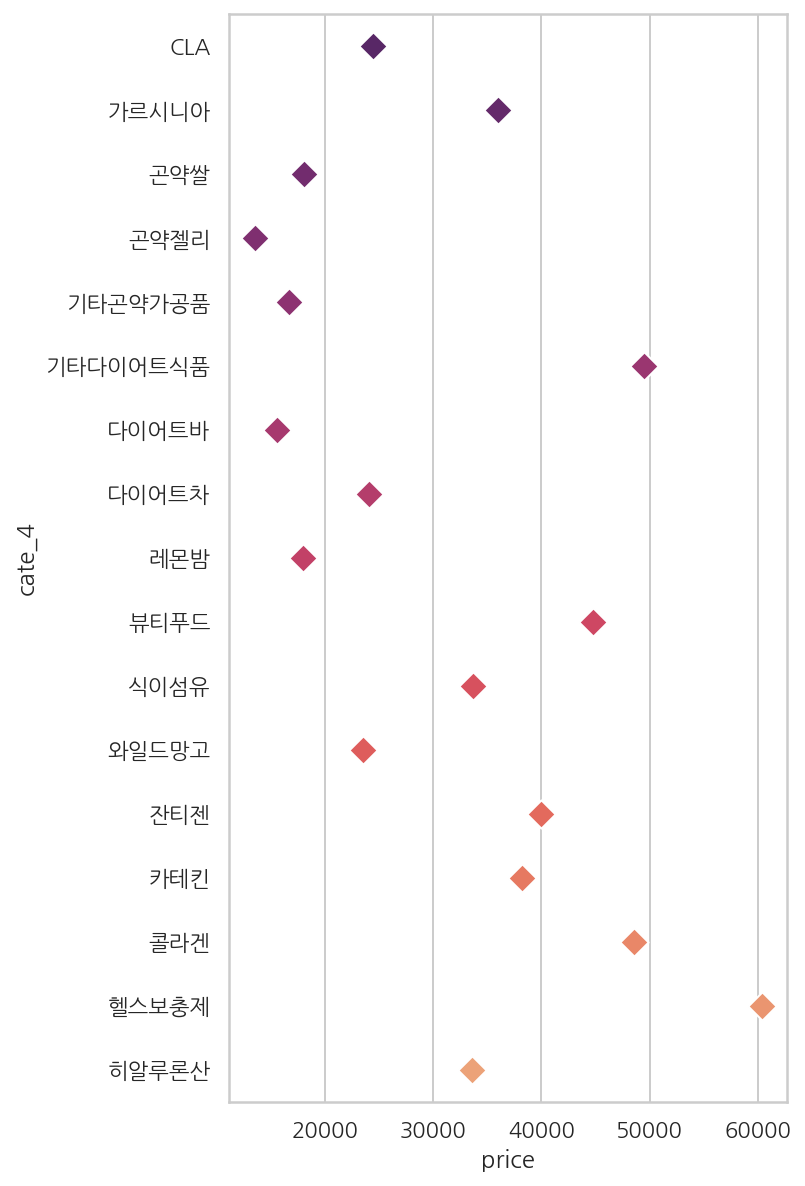

In [8]:
sns.set_theme(style = "whitegrid")
plt.figure(figsize = (5, 10))
plt.rcParams['font.family'] = 'NanumGothic'
sns.stripplot(x = "price", 
             y = "cate_4", 
             data = food_price,
             orient = "h",
             jitter = False, 
             palette = "flare_r",
             linewidth = 1,
             edgecolor = "w",
             marker ="D",
             size = 10 
            
             )

### 그래프 그리기 2. 
- 건강식품의 평균 가격

<AxesSubplot:xlabel='price', ylabel='cate_4'>

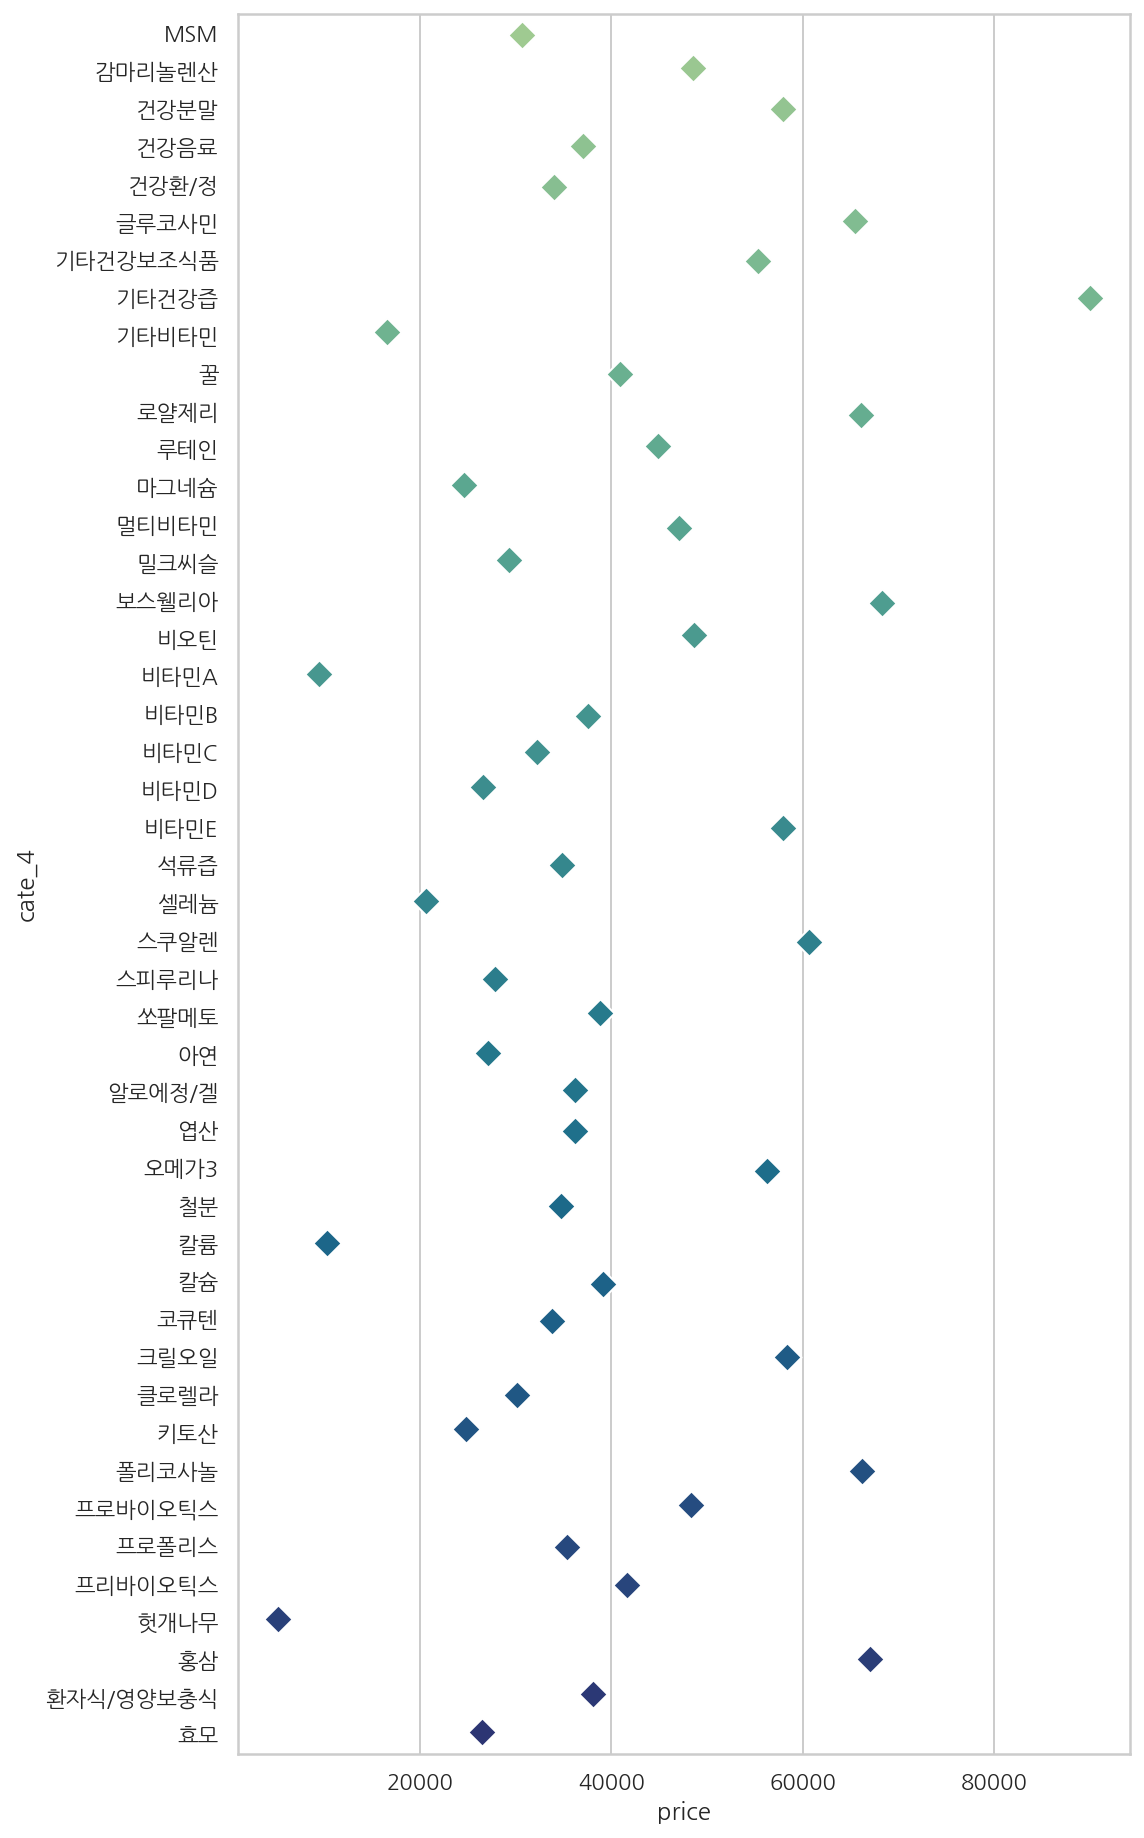

In [9]:
sns.set_theme(style = "whitegrid")
plt.figure(figsize = (8, 16))
plt.rcParams['font.family'] = 'NanumGothic'
sns.stripplot(x = "price", 
             y = "cate_4", 
             data = nutrients_price,
             orient = "h",
             palette = "crest",
             linewidth = 1,
             edgecolor = "w",
             marker ="D",
             size = 10 
            
             )

### 쓸데없고 예쁜 그래프를 그려보는 첫번째 시도

- 다이어트 식품의 등록 수와 평균 가격 수 (cate_4 기준)

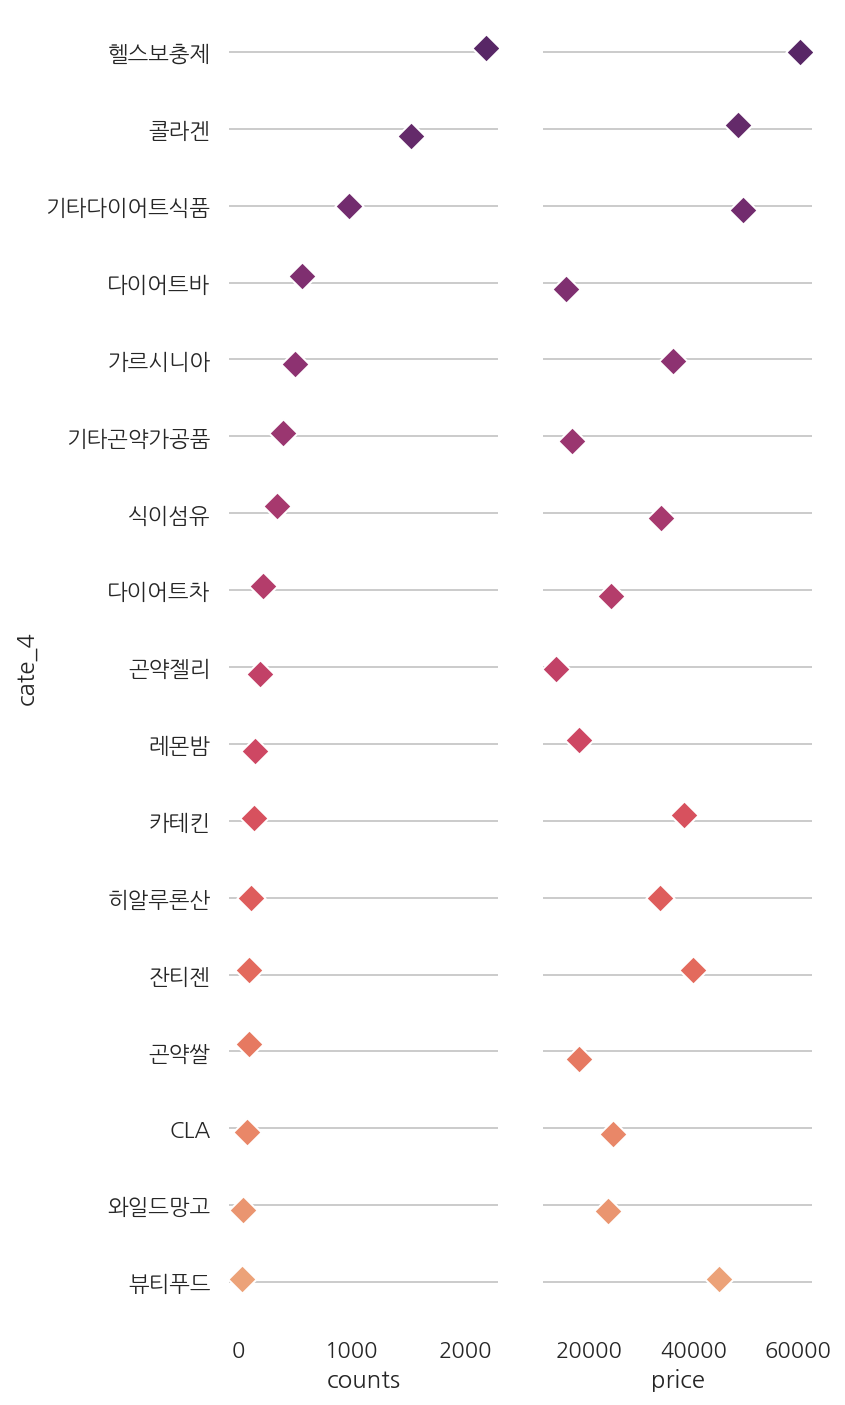

In [10]:
sns.set_theme(style = "whitegrid")
plt.rcParams['font.family'] = 'NanumGothic'
newtrial = sns.PairGrid(food_table, x_vars = food_table.columns[1:], y_vars =["cate_4"],
                       height = 10, aspect=.25)

newtrial.map(sns.stripplot, 
             orient = "h",
              
             palette = "flare_r",
             linewidth = 1,
             edgecolor = "w",
             marker ="D",
             size = 10)

newtrial.axes.flat[0].xaxis.grid(False)
newtrial.axes.flat[1].xaxis.grid(False)

newtrial.axes.flat[0].yaxis.grid(True)
newtrial.axes.flat[1].yaxis.grid(True)

sns.despine(left=True, bottom=True)

### 쓸데없고 예쁜 그래프를 그려보는 두번째 시도

- 건강기능식품의 등록 수와 평균 가격 수 (cate_4 기준)

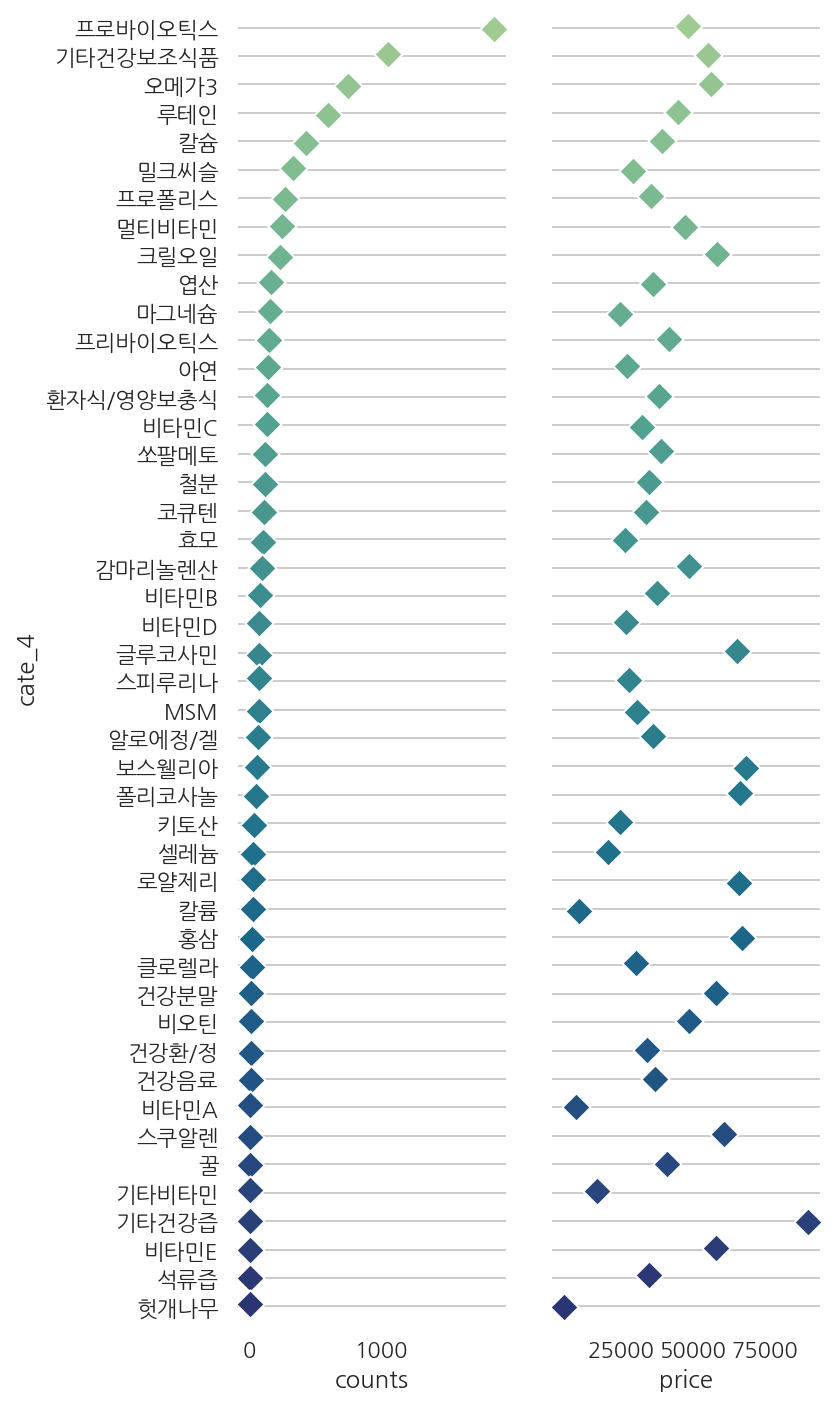

In [11]:
sns.set_theme(style = "whitegrid")
plt.rcParams['font.family'] = 'NanumGothic'

newtrial_2 = sns.PairGrid(nutri_table, x_vars = nutri_table.columns[1:], y_vars =["cate_4"],
                       height = 10, aspect=.25)

newtrial_2.map(sns.stripplot, 
             orient = "h",
             
             palette = "crest",
             linewidth = 1,
             edgecolor = "w",
             marker ="D",
             size = 10)

newtrial_2.axes.flat[0].xaxis.grid(False)
newtrial_2.axes.flat[1].xaxis.grid(False)

newtrial_2.axes.flat[0].yaxis.grid(True)
newtrial_2.axes.flat[1].yaxis.grid(True)

sns.despine(left=True, bottom=True)

### 연도 처리 
- date column(8자리 int형)을 연/월(6자리)로 바꾸기 
- 기존의 8자리 숫자를 바로 6자리 날짜로 바꾸려고 하면 에러가 나서,  
- 1) date column을 별도 리스트로 분리 
- 2) 8자리 숫자를 우선 str으로 바꿔 인덱싱으로 맨 뒤 2자리를 날려서 6자리 문자열로 변경하고
- 3) 처리한 리스트를 기존 테이블에 붙이기 
- 4) apply와 직접 정의한 함수를 이용하여 6자리 문자열을 날짜로 변경 (strptime은 string을 받음) 

In [12]:
#다이어트식품 처리 

date_list = []
date_list = healthfood["date"].values.tolist()
re_date = []    
for i in range(len(healthfood)):
    re_date.append(str(date_list[i])[0:6]) 

    
#기존 테이블에 새 컬럼으로 삽입 
healthfood["re_date"] = re_date

In [13]:
#6자리 문자열을 받아 6자리 날짜로 만드는 함수 
def to_date(x) :
    convert_date = datetime.strptime(x, "%Y%m")
    return convert_date

In [14]:
healthfood["re_date"] = healthfood["re_date"].apply(to_date)

In [15]:
healthfood.head(5)

name  price  brand cate_1  cate_2  \
0  절대콜라겐 - 프랑스 저분자 먹는 피쉬 어류 어린 가루 펩타이드 엘라스틴 비오틴  15000  절대콜라겐     식품  다이어트식품   
1                           GRN 분홍이+초록이 시즌2 SET  96000    GRN     식품  다이어트식품   
2                            분홍이 초록이 시즌2 다이어트세트  42780    GRN     식품  다이어트식품   
4                           하드코어버닝티 1+1 이벤트 버닝티  29900    NaN     식품  다이어트식품   
6                                  하드코어 버닝티 90g  29900    NaN     식품  다이어트식품   

     cate_3    cate_4  review      date  \
0       콜라겐       콜라겐  127297  20170617   
1  기타다이어트식품  기타다이어트식품       0  20160629   
2  기타다이어트식품  기타다이어트식품   93928  20190617   
4      뷰티푸드      뷰티푸드   79250  20180220   
6      뷰티푸드      뷰티푸드   75379  20181228   

                                                 tag    cate_5    re_date  
0                                                콜라겐       콜라겐 2017-06-01  
1                                                체지방  기타다이어트식품 2016-06-01  
2                                                NaN  기타다이어트식품 2019-06-01  
4  정성가득,건강에좋은음식,몸에좋은영양소,슈퍼웰빙,건강기능제품,헬씨,20대,40대,30...      뷰티푸드 2018-02-01  
6                                                NaN      뷰티푸드 2018-12-01

In [16]:
#건강기능식품처리

date_list = []
date_list = nutrients["date"].values.tolist()
re_date = []    
for i in range(len(nutrients)):
    re_date.append(str(date_list[i])[0:6]) 

#기존 테이블에 새 컬럼으로 삽입 
nutrients["re_date"] = re_date

In [17]:
nutrients["re_date"] = nutrients["re_date"].apply(to_date) #위에서 정의한 함수 사용

In [18]:
nutrients.head(5)

name  price   brand cate_1  \
88                     SMDR 데이엔딩슬립스타트 (락티움 수면 영양제 보조제)  64500     NaN     식품   
163    곤약 세라마이드+히알라스킨 먹는 인도 곤약감자추출물 히알루론산 /콜라겐,엘라스틴(부)  75800  파이토뉴트리     식품   
168  곤약 세라마이드 - 먹는 인도 곤약감자 세라미드 추출물 피부영양제품 이너뷰티 비오틴(부)  36500  파이토뉴트리     식품   
273                                  슬립밸런스 700mg x 30정  59800  파이토뉴트리     식품   
277                     나우푸드 더블 스트랭스 L-아르기닌 1000mg 타블렛  14900    나우푸드     식품   

    cate_2 cate_3    cate_4  review      date                           tag  \
88    건강식품    영양제  기타건강보조식품   15822  20191114                           NaN   
163   건강식품    영양제  기타건강보조식품   20314  20181214                피부영양제,기타건강기능식품   
168   건강식품    영양제  기타건강보조식품   20069  20180206  피부영양공급,피부영양제,피부장벽강화,기타건강보조식품   
273   건강식품    영양제  기타건강보조식품   16003  20190423                           NaN   
277   건강식품    영양제  기타건강보조식품   15776  20190508                         120개입   

         cate_5    re_date  
88        수면보조제 2019-11-01  
163          곤약 2018-12-01  
168          곤약 2018-02-01  
273       수면보조제 2019-04-01  
277  아르기닌(아미노산) 2019-05-01

### 그래프그리기 3.
 - 다이어트식품 중 등록 제품 순으로 Top 5를 선정하여, 언제 등록되었는지 산점도로 표현 
 - 건강기능식품 중 등록 제품 순으로 Top 5를 선정하여, 언제 등록되었는지 산점도로 표현 
    

In [19]:
#임의의 데이터 처리 
#가장 이른 제품 등록은 2010년 이전에도 이루어졌기 때문에 (min() 사용) 
#임의로 연도를 최근 5개년으로 제한 -> 201601~
#cate_4는 등록 수가 많은 상위 5개를 사용 (위에서 만든 food_counts, nutrients_counts 테이블 재활용하기)

In [20]:
food_top_5 = food_counts.sort_values(by = "name", ascending = False).iloc[:5]["cate_4"]
food_top_5 = list(food_top_5) #시리즈를 리스트로 반환
nutri_top_5 = nutrients_counts.sort_values(by = "name", ascending = False).iloc[:5]["cate_4"]
nutri_top_5 = list(nutri_top_5) 
food_top_5, nutri_top_5

(['헬스보충제', '콜라겐', '기타다이어트식품', '다이어트바', '가르시니아'],
 ['프로바이오틱스', '기타건강보조식품', '오메가3', '루테인', '칼슘'])

In [21]:
food_table_2 = healthfood[healthfood["date"] >= 20160101]
food_table_2 = food_table_2[food_table_2["cate_4"].isin(food_top_5)]

In [22]:
#처리가 잘됐는지 확인하기 
food_table_2["date"].min(), food_table_2["cate_4"].unique()

(20160105, array(['콜라겐', '기타다이어트식품', '헬스보충제', '가르시니아', '다이어트바'], dtype=object))

In [23]:
nutri_table_2 = nutrients[nutrients["date"] >= 20160101]
nutri_table_2 = nutri_table_2[nutri_table_2["cate_4"].isin(nutri_top_5)]

In [24]:
#처리가 잘됐는지 확인하기 
nutri_table_2["date"].min(), nutri_table_2["cate_4"].unique()

(20160106, array(['기타건강보조식품', '프로바이오틱스', '오메가3', '루테인', '칼슘'], dtype=object))

In [25]:
#연/월별 각 제품군이 몇개등록되었는지 확인을 위해 count로 그룹핑하기 
food_group = food_table_2.groupby(["cate_4", "re_date"]).count().reset_index()
nutri_group = nutri_table_2.groupby(["cate_4", "re_date"]).count().reset_index()


<AxesSubplot:xlabel='re_date', ylabel='name'>

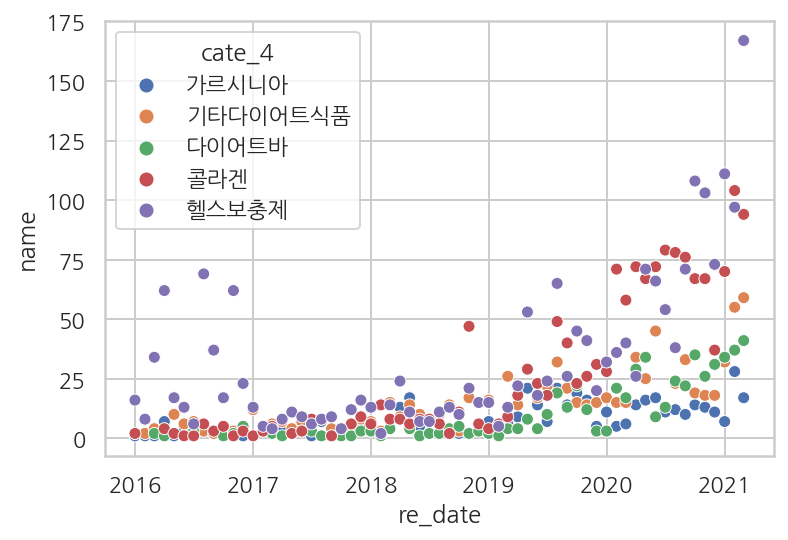

In [26]:
sns.set_theme(style = "whitegrid")
plt.rcParams['font.family'] = 'NanumGothic'
sns.scatterplot(x= "re_date", y = "name", data=food_group, hue = "cate_4")


<AxesSubplot:xlabel='re_date', ylabel='name'>

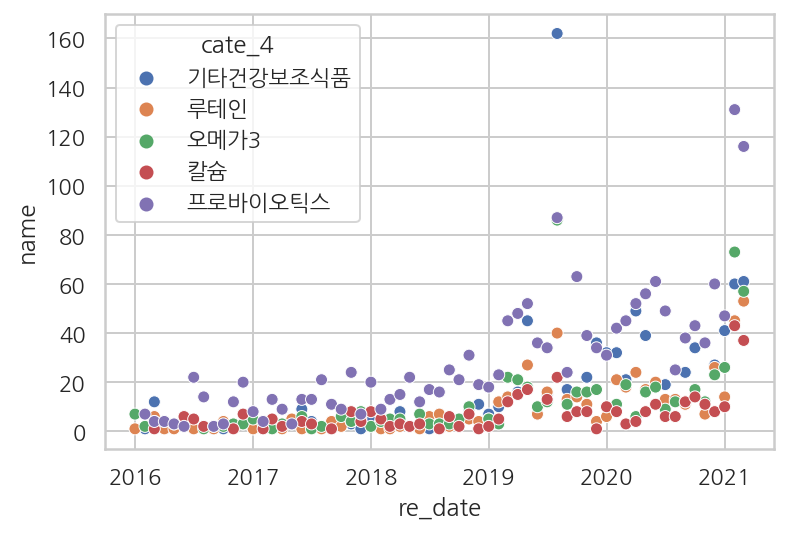

In [27]:
sns.set_theme(style = "whitegrid")
plt.rcParams['font.family'] = 'NanumGothic'
sns.scatterplot(x= "re_date", y = "name", data=nutri_group, hue = "cate_4")


### 그래프 그리기 4.
- 위의 그래프를 제품군 별로 개별 그래프로 나타내기 
- subplot 사용 

In [28]:
#데이터셋 분리
health = food_group[food_group["cate_4"] == "헬스보충제"]
collagen = food_group[food_group["cate_4"] == "콜라겐"]
diet_etc = food_group[food_group["cate_4"] == "기타다이어트식품"]
diet_bar = food_group[food_group["cate_4"] == "다이어트바"]
garcinia = food_group[food_group["cate_4"] == "가르시니아"]

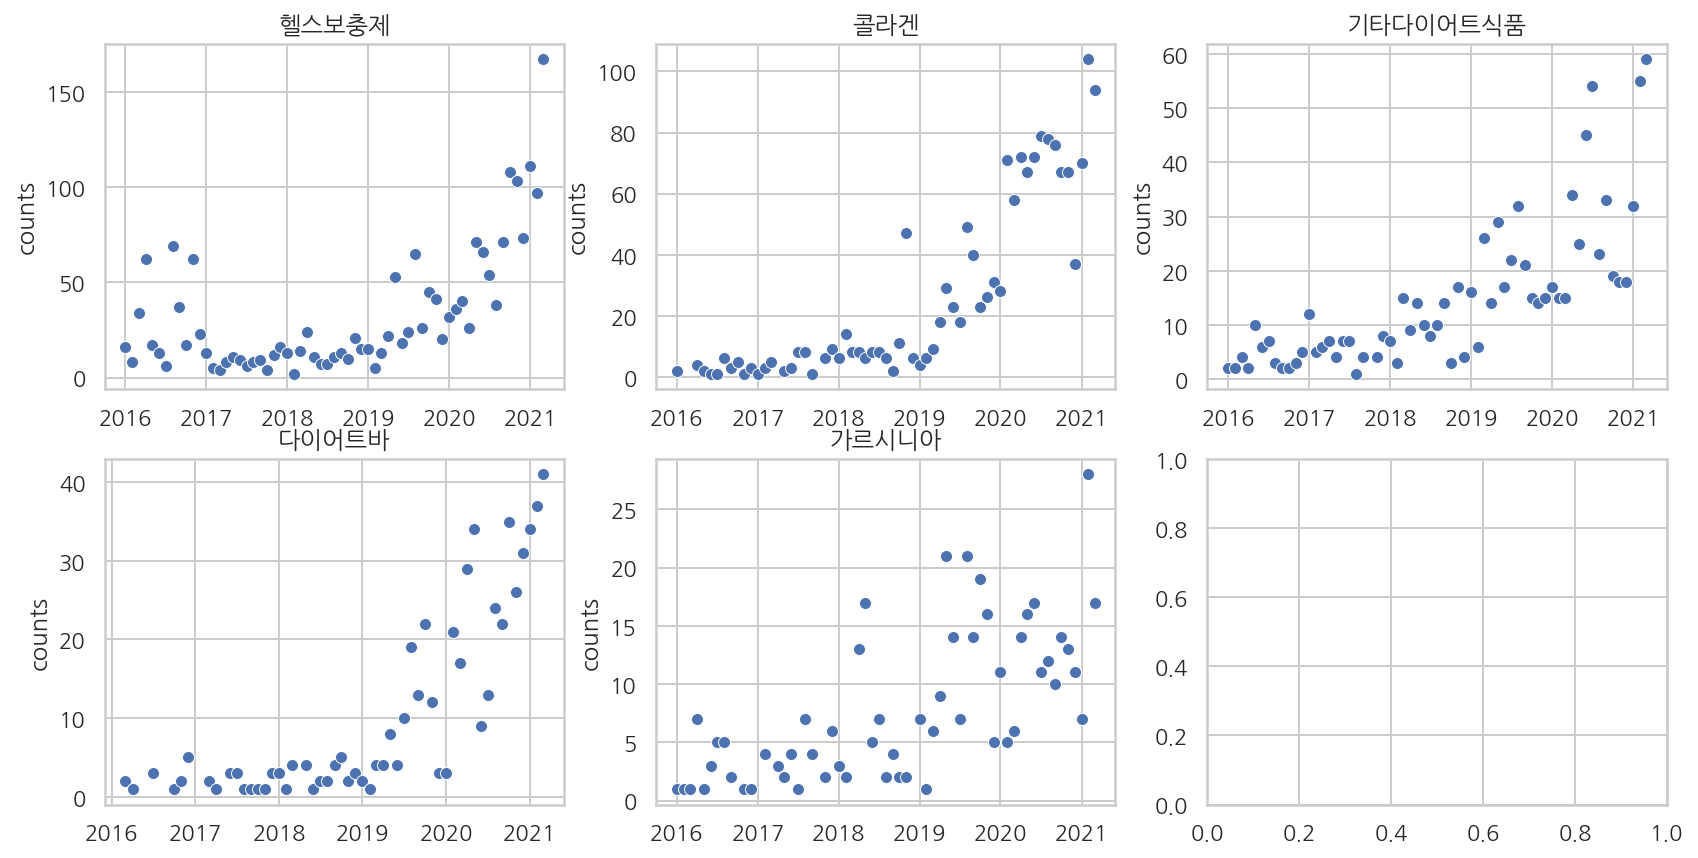

In [29]:
fig, axes = plt.subplots(nrows = 2, ncols =3, figsize = (14, 7))

ax = sns.scatterplot(x= "re_date", y = "name", data=health, ax = axes[0,0])
ax.set_title("헬스보충제")
ax.set_ylabel("counts");ax.set_xlabel("") 

ax = sns.scatterplot(x= "re_date", y = "name", data=collagen, ax = axes[0,1])
ax.set_title("콜라겐")
ax.set_ylabel("counts");ax.set_xlabel("")

ax = sns.scatterplot(x= "re_date", y = "name", data=diet_etc, ax = axes[0,2])
ax.set_title("기타다이어트식품")
ax.set_ylabel("counts");ax.set_xlabel("")

ax = sns.scatterplot(x= "re_date", y = "name", data=diet_bar, ax = axes[1,0])
ax.set_title("다이어트바")
ax.set_ylabel("counts");ax.set_xlabel("")

ax = sns.scatterplot(x= "re_date", y = "name", data=garcinia, ax = axes[1,1])
ax.set_title("가르시니아")
ax.set_ylabel("counts");ax.set_xlabel("")


plt.show()

#### 참고 자료 
- 헬스보충제 등록 수는 네이버 검색 트렌드와 일치
- 왜일까? 어쩌면 허벌라이프가 대세이던 시절이라서? 
- 네이버 트렌드랩에서 성별을 구분해봤을 때 헬스보충제 키워드는 남성이 압도적
- (키워드로서) 헬스보충제의 인기는 점점 사그라들고 최근에는 단백질 보충제가 대세 → 사람들이 "헬스보충제"로 퉁치지 않고 세부 성분별("프로틴", "관절약", "카페인" 등등) 로 챙겨먹기 시작했다고 말할 수 있지 않을까?)


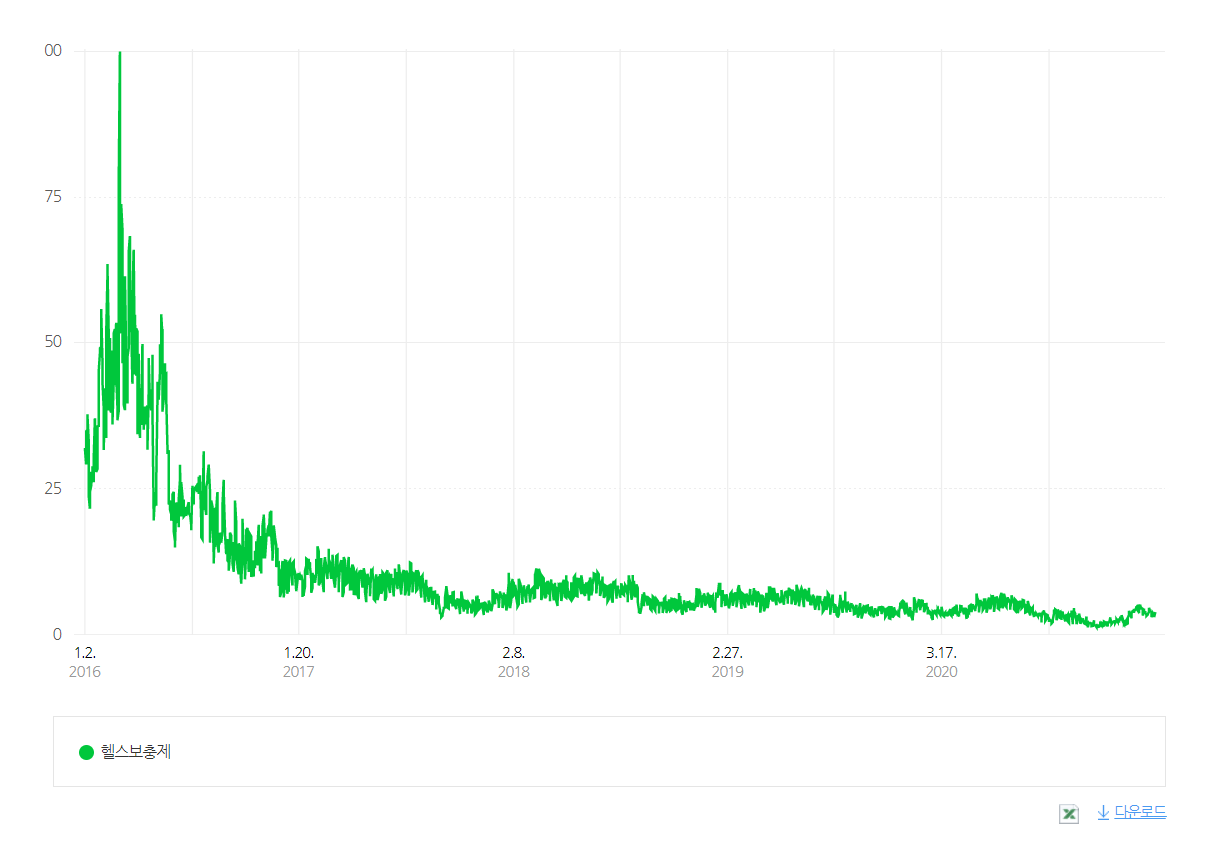
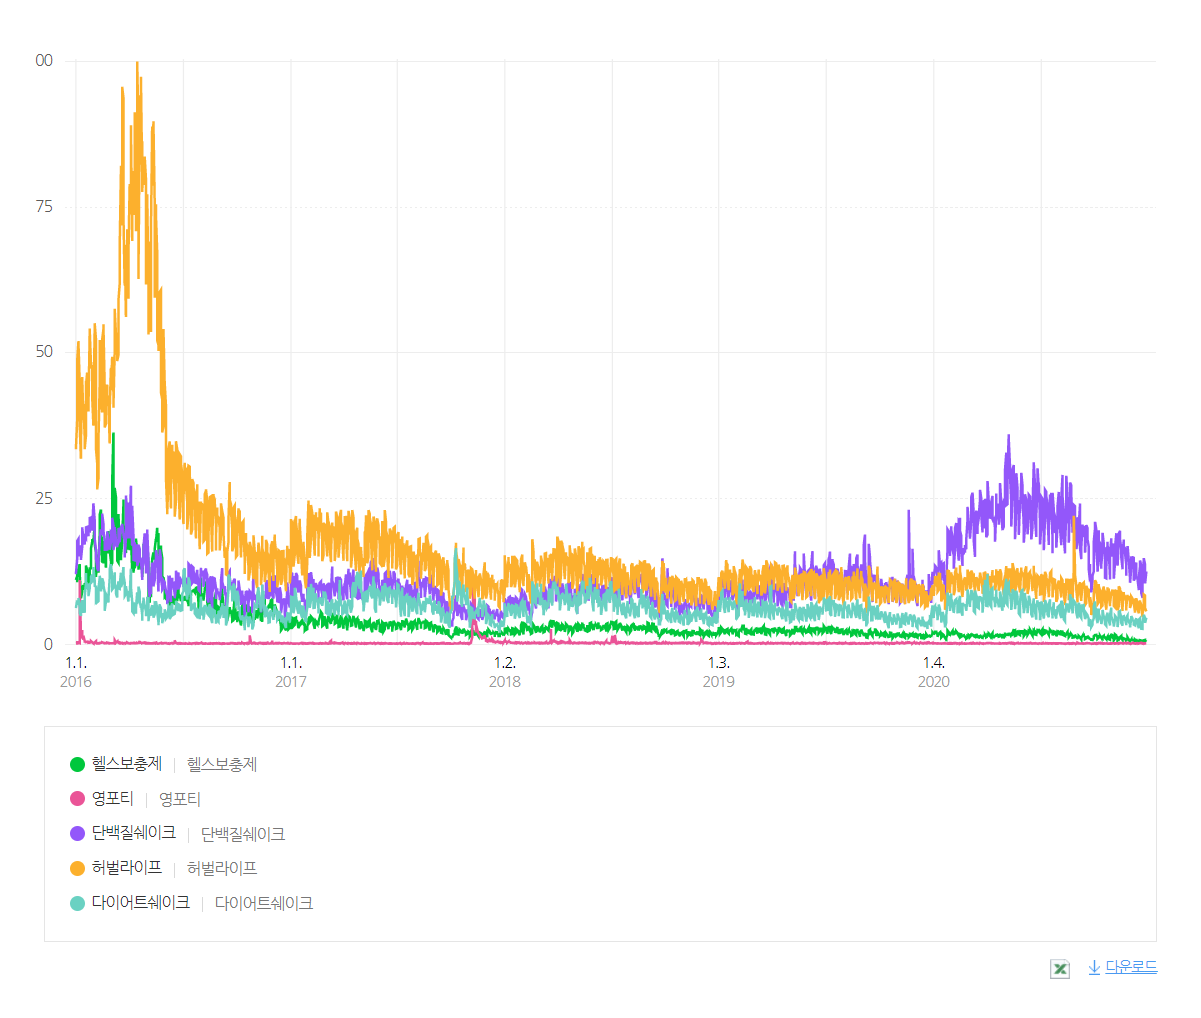


In [30]:
#데이터셋 분리
probio = nutri_group[nutri_group["cate_4"] == "프로바이오틱스"]
health_etc = nutri_group[nutri_group["cate_4"] == "기타건강보조식품"]
omega = nutri_group[nutri_group["cate_4"] == "오메가3"]
lutein = nutri_group[nutri_group["cate_4"] == "루테인"]
cal = nutri_group[nutri_group["cate_4"] == "칼슘"]


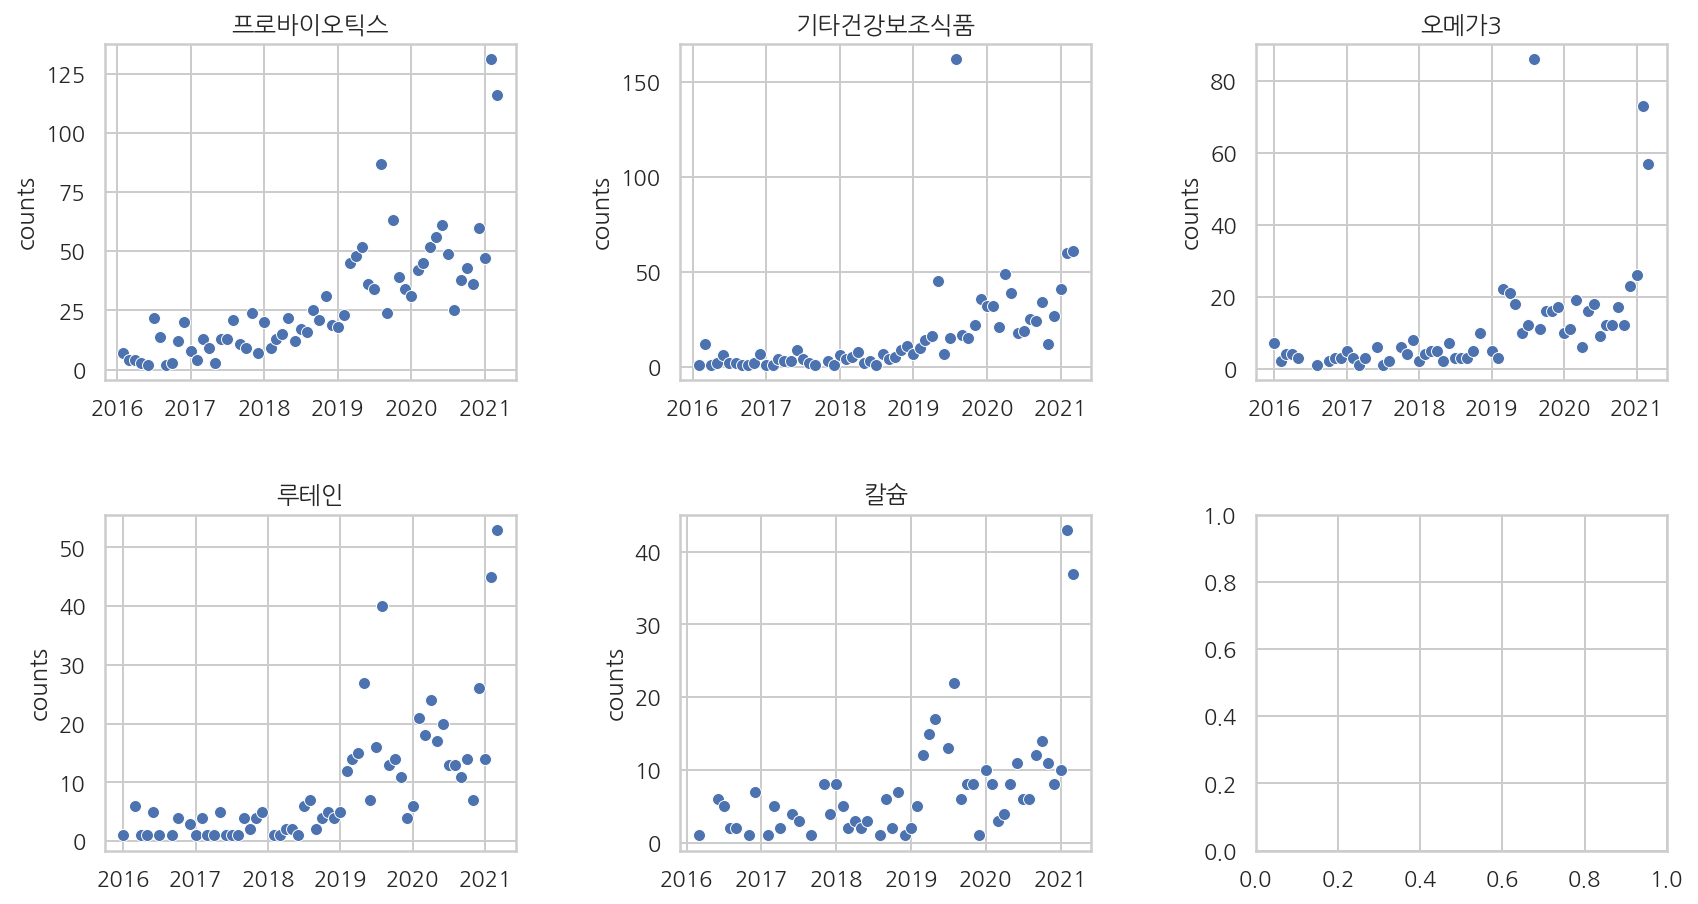

In [31]:
fig, axes = plt.subplots(nrows = 2, ncols =3, figsize = (14, 7))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)

ax = sns.scatterplot(x= "re_date", y = "name", data=probio, ax = axes[0,0])
ax.set_title("프로바이오틱스")
ax.set_ylabel("counts");ax.set_xlabel("")

ax = sns.scatterplot(x= "re_date", y = "name", data=health_etc, ax = axes[0,1])
ax.set_title("기타건강보조식품")
ax.set_ylabel("counts");ax.set_xlabel("")

ax = sns.scatterplot(x= "re_date", y = "name", data=omega, ax = axes[0,2])
ax.set_title("오메가3")
ax.set_ylabel("counts");ax.set_xlabel("")

ax = sns.scatterplot(x= "re_date", y = "name", data=lutein, ax = axes[1,0])
ax.set_title("루테인")
ax.set_ylabel("counts");ax.set_xlabel("")

ax = sns.scatterplot(x= "re_date", y = "name", data=cal, ax = axes[1,1])
ax.set_title("칼슘")
ax.set_ylabel("counts");ax.set_xlabel("")

plt.show()

In [32]:
nutrients["cate_5"].unique()

array(['수면보조제', '곤약', '아르기닌(아미노산)', '효소', '은행추출물', '초록입홍합', '헤모힘', '타트체리',
       '기타영양제', '매스틱', '구연산', '마카', '초유단백질', '양태반', '아미노산', '베타카로틴',
       '엘더베리', '커큐민', '석류추출물', '퀘르세틴', '기타식물추출물', '크랜베리', '베타인 HCL',
       '숙취해소제', '요오드', '라이코펜', '나토키나제', '노니', '마늘', '타우린', '폴리페놀',
       '대구 간유', '녹용/녹혈', 'SAMe', '프로바이오틱스', '밀크씨슬', '멀티비타민', '오메가3',
       '크릴오일', '비타민C', '환자식/영양보충식', '루테인', '홍삼', '프리바이오틱스', '마그네슘', '엽산',
       '프로폴리스', '폴리코사놀', '비타민B', '기타건강보조식품', '칼슘', '알로에정/겔', '비타민D',
       '코큐텐', '철분', '보스웰리아', '효모', '스피루리나', '아연', '키토산', '쏘팔메토', '글루코사민',
       '비오틴', '감마리놀렌산', 'MSM', '칼륨', '건강분말', '클로렐라', '셀레늄', '헛개나무',
       '건강음료', '로얄제리', '비타민A', '스쿠알렌', '건강환/정', '석류즙', '기타건강즙', '꿀',
       '비타민E', '기타비타민'], dtype=object)

In [33]:
nutri_table_3 = nutrients[nutrients["date"] >= 20160101]
nutri_table_3 = nutri_table_3[nutri_table_3["cate_5"].isin(["초록입홍합", "멀티비타민","밀크씨슬","초유단백질", "수면보조제", "곤약"])]
nutri_group_3 = nutri_table_3.groupby(["cate_5", "re_date"]).count().reset_index()

mussel = nutri_group_3[nutri_group_3["cate_5"] == "초록입홍합"]
vit = nutri_group_3[nutri_group_3["cate_5"] == "멀티비타민"]
milk = nutri_group_3[nutri_group_3["cate_5"] == "밀크씨슬"]
protein = nutri_group_3[nutri_group_3["cate_5"] == "초유단백질"]
sleep = nutri_group_3[nutri_group_3["cate_5"] == "수면보조제"]
gonjac = nutri_group_3[nutri_group_3["cate_5"] == "곤약"]


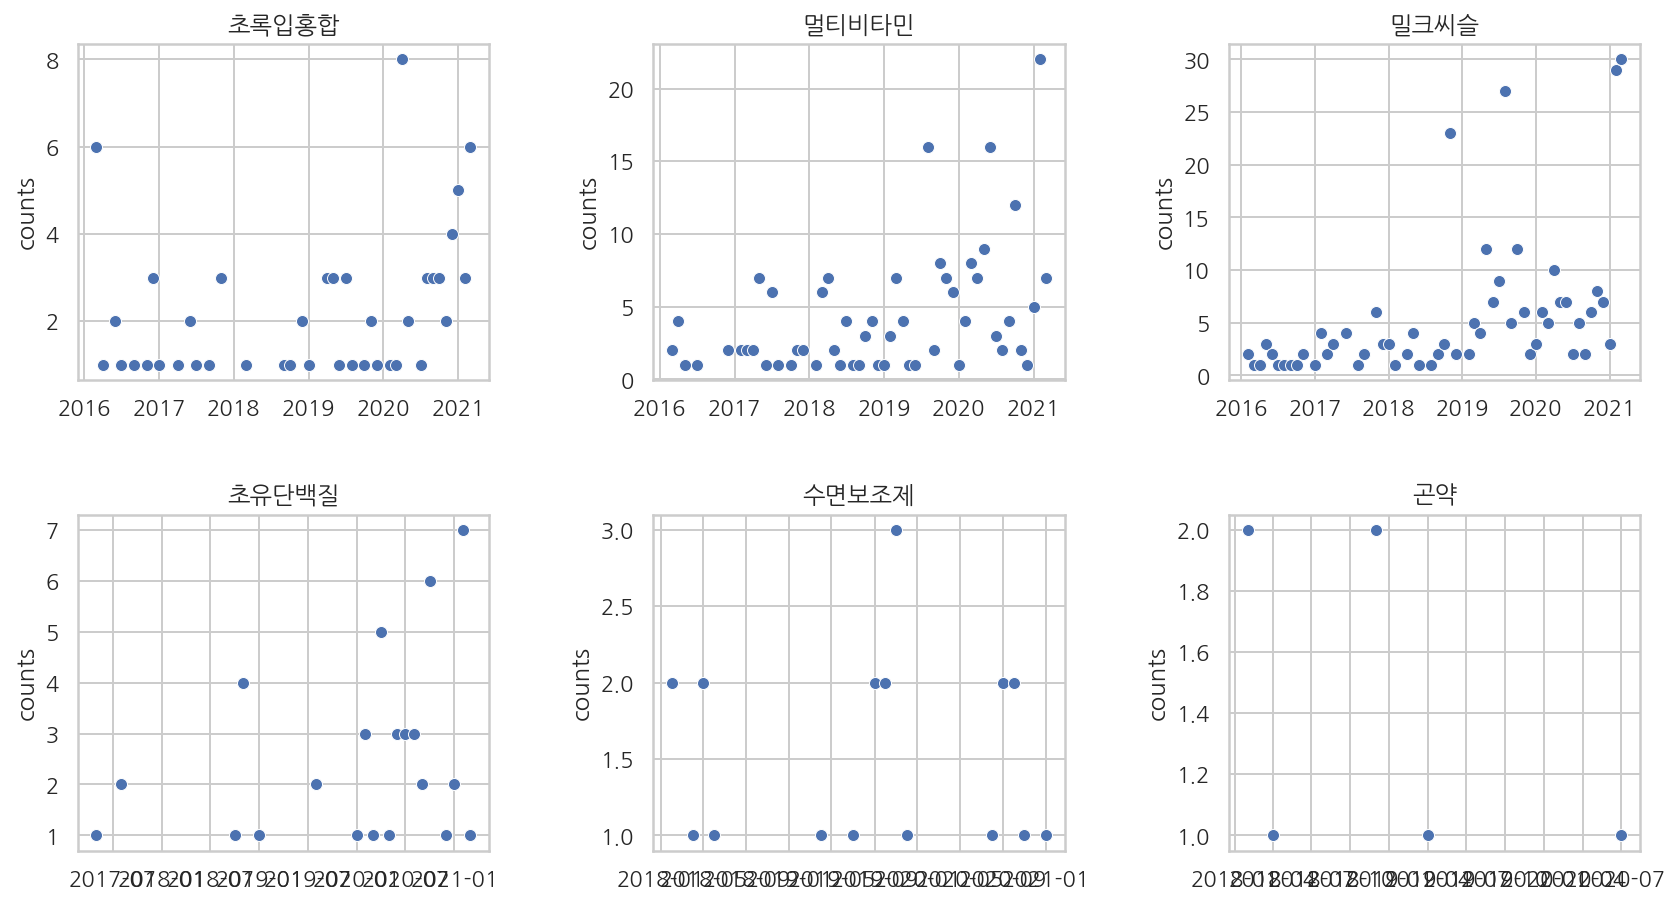

In [34]:
fig, axes = plt.subplots(nrows = 2, ncols =3, figsize = (14, 7))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)

ax = sns.scatterplot(x= "re_date", y = "name", data=mussel, ax = axes[0,0])
ax.set_title("초록입홍합")
ax.set_ylabel("counts");ax.set_xlabel("")

ax = sns.scatterplot(x= "re_date", y = "name", data=vit, ax = axes[0,1])
ax.set_title("멀티비타민")
ax.set_ylabel("counts");ax.set_xlabel("")

ax = sns.scatterplot(x= "re_date", y = "name", data=milk, ax = axes[0,2])
ax.set_title("밀크씨슬")
ax.set_ylabel("counts");ax.set_xlabel("")

ax = sns.scatterplot(x= "re_date", y = "name", data=protein, ax = axes[1,0])
ax.set_title("초유단백질")
ax.set_ylabel("counts");ax.set_xlabel("")

ax = sns.scatterplot(x= "re_date", y = "name", data=sleep, ax = axes[1,1])
ax.set_title("수면보조제")
ax.set_ylabel("counts");ax.set_xlabel("")

ax = sns.scatterplot(x= "re_date", y = "name", data=gonjac, ax = axes[1,2])
ax.set_title("곤약")
ax.set_ylabel("counts");ax.set_xlabel("")

plt.show()

### 그래프 그리기 5.
- 이번엔 제품군별로 x : 등록 시기 - y : 가격의 그래프
- 그냥 많이 등록될 때 가격도 다양한 것 같다...
- subplot 사용 

In [35]:
"""
fig, axes = plt.subplots(nrows = 2, ncols =3, figsize = (12, 6))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)

ax = sns.scatterplot(x= "re_date", y = "price", data=healthfood[healthfood["cate_4"]=="헬스보충제"], ax = axes[0,0])
ax.set_title("헬스보충제")
ax.set_ylabel("price");ax.set_xlabel("") 

ax = sns.scatterplot(x= "re_date", y = "price", data=healthfood[healthfood["cate_4"]=="콜라겐"], ax = axes[0,1])
ax.set_title("콜라겐")
ax.set_ylabel("price");ax.set_xlabel("")

ax = sns.scatterplot(x= "re_date", y = "price", data=healthfood[healthfood["cate_4"]=="기타다이어트식품"], ax = axes[0,2])
ax.set_title("기타다이어트식품")
ax.set_ylabel("price");ax.set_xlabel("")

ax = sns.scatterplot(x= "re_date", y = "price", data=healthfood[healthfood["cate_4"]=="다이어트바"], ax = axes[1,0])
ax.set_title("다이어트바")
ax.set_ylabel("price");ax.set_xlabel("")

ax = sns.scatterplot(x= "re_date", y = "price", data=healthfood[healthfood["cate_4"]=="가르시니아"], ax = axes[1,1])
ax.set_title("가르시니아")
ax.set_ylabel("price");ax.set_xlabel("")


plt.show()
"""

'\nfig, axes = plt.subplots(nrows = 2, ncols =3, figsize = (12, 6))\nplt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)\n\nax = sns.scatterplot(x= "re_date", y = "price", data=healthfood[healthfood["cate_4"]=="헬스보충제"], ax = axes[0,0])\nax.set_title("헬스보충제")\nax.set_ylabel("price");ax.set_xlabel("") \n\nax = sns.scatterplot(x= "re_date", y = "price", data=healthfood[healthfood["cate_4"]=="콜라겐"], ax = axes[0,1])\nax.set_title("콜라겐")\nax.set_ylabel("price");ax.set_xlabel("")\n\nax = sns.scatterplot(x= "re_date", y = "price", data=healthfood[healthfood["cate_4"]=="기타다이어트식품"], ax = axes[0,2])\nax.set_title("기타다이어트식품")\nax.set_ylabel("price");ax.set_xlabel("")\n\nax = sns.scatterplot(x= "re_date", y = "price", data=healthfood[healthfood["cate_4"]=="다이어트바"], ax = axes[1,0])\nax.set_title("다이어트바")\nax.set_ylabel("price");ax.set_xlabel("")\n\nax = sns.scatterplot(x= "re_date", y = "price", data=healthfood[healthfood["cate_4"]=="가르시니아"], ax = axes[1,1])\nax.s

In [36]:
"""
fig, axes = plt.subplots(nrows = 2, ncols =3, figsize = (14, 7))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)

ax = sns.scatterplot(x= "re_date", y = "price", data=nutrients[nutrients["cate_4"]=="프로바이오틱스"], ax = axes[0,0])
ax.set_title("프로바이오틱스")
ax.set_ylabel("price");ax.set_xlabel("")

ax = sns.scatterplot(x= "re_date", y = "price", data=nutrients[nutrients["cate_4"]=="기타건강보조식품"], ax = axes[0,1])
ax.set_title("기타건강보조식품")
ax.set_ylabel("price");ax.set_xlabel("")

ax = sns.scatterplot(x= "re_date", y = "price", data=nutrients[nutrients["cate_4"]=="오메가3"], ax = axes[0,2])
ax.set_title("오메가3")
ax.set_ylabel("price");ax.set_xlabel("")

ax = sns.scatterplot(x= "re_date", y = "price", data=nutrients[nutrients["cate_4"]=="루테인"], ax = axes[1,0])
ax.set_title("루테인")
ax.set_ylabel("price");ax.set_xlabel("")

ax = sns.scatterplot(x= "re_date", y = "price", data=nutrients[nutrients["cate_4"]=="칼슘"], ax = axes[1,1])
ax.set_title("칼슘")
ax.set_ylabel("price");ax.set_xlabel("")

plt.show()
"""

'\nfig, axes = plt.subplots(nrows = 2, ncols =3, figsize = (14, 7))\nplt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)\n\nax = sns.scatterplot(x= "re_date", y = "price", data=nutrients[nutrients["cate_4"]=="프로바이오틱스"], ax = axes[0,0])\nax.set_title("프로바이오틱스")\nax.set_ylabel("price");ax.set_xlabel("")\n\nax = sns.scatterplot(x= "re_date", y = "price", data=nutrients[nutrients["cate_4"]=="기타건강보조식품"], ax = axes[0,1])\nax.set_title("기타건강보조식품")\nax.set_ylabel("price");ax.set_xlabel("")\n\nax = sns.scatterplot(x= "re_date", y = "price", data=nutrients[nutrients["cate_4"]=="오메가3"], ax = axes[0,2])\nax.set_title("오메가3")\nax.set_ylabel("price");ax.set_xlabel("")\n\nax = sns.scatterplot(x= "re_date", y = "price", data=nutrients[nutrients["cate_4"]=="루테인"], ax = axes[1,0])\nax.set_title("루테인")\nax.set_ylabel("price");ax.set_xlabel("")\n\nax = sns.scatterplot(x= "re_date", y = "price", data=nutrients[nutrients["cate_4"]=="칼슘"], ax = axes[1,1])\nax.set_title("칼슘

In [37]:
"""
fig, axes = plt.subplots(nrows = 2, ncols =3, figsize = (14, 7))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)

ax = sns.scatterplot(x= "price", y = "review", data=healthfood[healthfood["cate_4"]=="헬스보충제"], ax = axes[0,0])
ax.set_title("헬스보충제")
ax.set_ylabel("review");ax.set_xlabel("price") 

ax = sns.scatterplot(x= "price", y = "review", data=healthfood[healthfood["cate_4"]=="콜라겐"], ax = axes[0,1])
ax.set_title("콜라겐")
ax.set_ylabel("review");ax.set_xlabel("price") 

ax = sns.scatterplot(x= "price", y = "review", data=healthfood[healthfood["cate_4"]=="기타다이어트식품"], ax = axes[0,2])
ax.set_title("기타다이어트식품")
ax.set_ylabel("review");ax.set_xlabel("price") 

ax = sns.scatterplot(x= "price", y = "review", data=healthfood[healthfood["cate_4"]=="다이어트바"], ax = axes[1,0])
ax.set_title("다이어트바")
ax.set_ylabel("review");ax.set_xlabel("price") 

ax = sns.scatterplot(x= "price", y = "review", data=healthfood[healthfood["cate_4"]=="가르시니아"], ax = axes[1,1])
ax.set_title("가르시니아")
ax.set_ylabel("review");ax.set_xlabel("price") 


plt.show()
"""

'\nfig, axes = plt.subplots(nrows = 2, ncols =3, figsize = (14, 7))\nplt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)\n\nax = sns.scatterplot(x= "price", y = "review", data=healthfood[healthfood["cate_4"]=="헬스보충제"], ax = axes[0,0])\nax.set_title("헬스보충제")\nax.set_ylabel("review");ax.set_xlabel("price") \n\nax = sns.scatterplot(x= "price", y = "review", data=healthfood[healthfood["cate_4"]=="콜라겐"], ax = axes[0,1])\nax.set_title("콜라겐")\nax.set_ylabel("review");ax.set_xlabel("price") \n\nax = sns.scatterplot(x= "price", y = "review", data=healthfood[healthfood["cate_4"]=="기타다이어트식품"], ax = axes[0,2])\nax.set_title("기타다이어트식품")\nax.set_ylabel("review");ax.set_xlabel("price") \n\nax = sns.scatterplot(x= "price", y = "review", data=healthfood[healthfood["cate_4"]=="다이어트바"], ax = axes[1,0])\nax.set_title("다이어트바")\nax.set_ylabel("review");ax.set_xlabel("price") \n\nax = sns.scatterplot(x= "price", y = "review", data=healthfood[healthfood["cate_4"]=="가르시니아"],

In [38]:
"""
fig, axes = plt.subplots(nrows = 2, ncols =3, figsize = (14, 7))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)

ax = sns.scatterplot(x= "price", y = "review", data=nutrients[nutrients["cate_4"]=="프로바이오틱스"], ax = axes[0,0])
ax.set_title("프로바이오틱스")
ax.set_ylabel("review");ax.set_xlabel("price")

ax = sns.scatterplot(x= "price", y = "review", data=nutrients[nutrients["cate_4"]=="기타건강보조식품"], ax = axes[0,1])
ax.set_title("기타건강보조식품")
ax.set_ylabel("review");ax.set_xlabel("price")

ax = sns.scatterplot(x= "price", y = "review", data=nutrients[nutrients["cate_4"]=="오메가3"], ax = axes[0,2])
ax.set_title("오메가3")
ax.set_ylabel("review");ax.set_xlabel("price")

ax = sns.scatterplot(x= "price", y = "review", data=nutrients[nutrients["cate_4"]=="루테인"], ax = axes[1,0])
ax.set_title("루테인")
ax.set_ylabel("review");ax.set_xlabel("price")

ax = sns.scatterplot(x= "price", y = "review", data=nutrients[nutrients["cate_4"]=="칼슘"], ax = axes[1,1])
ax.set_title("칼슘")
ax.set_ylabel("review");ax.set_xlabel("price")

plt.show()
"""

'\nfig, axes = plt.subplots(nrows = 2, ncols =3, figsize = (14, 7))\nplt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)\n\nax = sns.scatterplot(x= "price", y = "review", data=nutrients[nutrients["cate_4"]=="프로바이오틱스"], ax = axes[0,0])\nax.set_title("프로바이오틱스")\nax.set_ylabel("review");ax.set_xlabel("price")\n\nax = sns.scatterplot(x= "price", y = "review", data=nutrients[nutrients["cate_4"]=="기타건강보조식품"], ax = axes[0,1])\nax.set_title("기타건강보조식품")\nax.set_ylabel("review");ax.set_xlabel("price")\n\nax = sns.scatterplot(x= "price", y = "review", data=nutrients[nutrients["cate_4"]=="오메가3"], ax = axes[0,2])\nax.set_title("오메가3")\nax.set_ylabel("review");ax.set_xlabel("price")\n\nax = sns.scatterplot(x= "price", y = "review", data=nutrients[nutrients["cate_4"]=="루테인"], ax = axes[1,0])\nax.set_title("루테인")\nax.set_ylabel("review");ax.set_xlabel("price")\n\nax = sns.scatterplot(x= "price", y = "review", data=nutrients[nutrients["cate_4"]=="칼슘"], ax = axes[1,1]

궁금한 것 몇 가지

- 사람들이 꾸준히 먹는 기본적인 것들(like 유산균)은 대체로 가성비 구입이 많고 
  특별히 추가적으로 먹는 것들(꾸준히는 안 먹고 가끔 챙겨먹는 좋은 것들 - like 밀크씨슬)은 가격대가 다양할까? 

- 아동용은 좀더 비쌀까? (키즈 영양제 등 부모가 아이를 위해 구입하는 물건) 

- 헬스보충제는 계속 먹어야 하니 대체로 가성비로 구입하고 / 가르시니아 같은 단기용은 비싸도 살까?


정리하자면 --------------------------------------------------------

- 1. 단기효과용 / 혹은 가끔 먹는 것들은 비싸도 리뷰가 많고, 
     장기적으로 먹어야 하는 꾸준템은 가성비 구입이 많을 것이다 (쌀 수록 리뷰가 많을 것이다)
     *홍삼의 경우, 장기적으로 먹어야 하는 꾸준템인데 비싸서 버림받았다 
     *효과에 따른 가격 정책 제안(...)
     
- 2. 단기효과용은 올라오는 시즌이 있고, 장기효과용은 딱히 시즌이 발견되지 않을 것이다
     
- 3. 어린이용은 성인용에 비해 비싸다? (아이를 위해 구입~~)



In [39]:
question = nutrients[["name", "re_date"]].groupby("re_date").count().reset_index()


<AxesSubplot:xlabel='re_date', ylabel='name'>

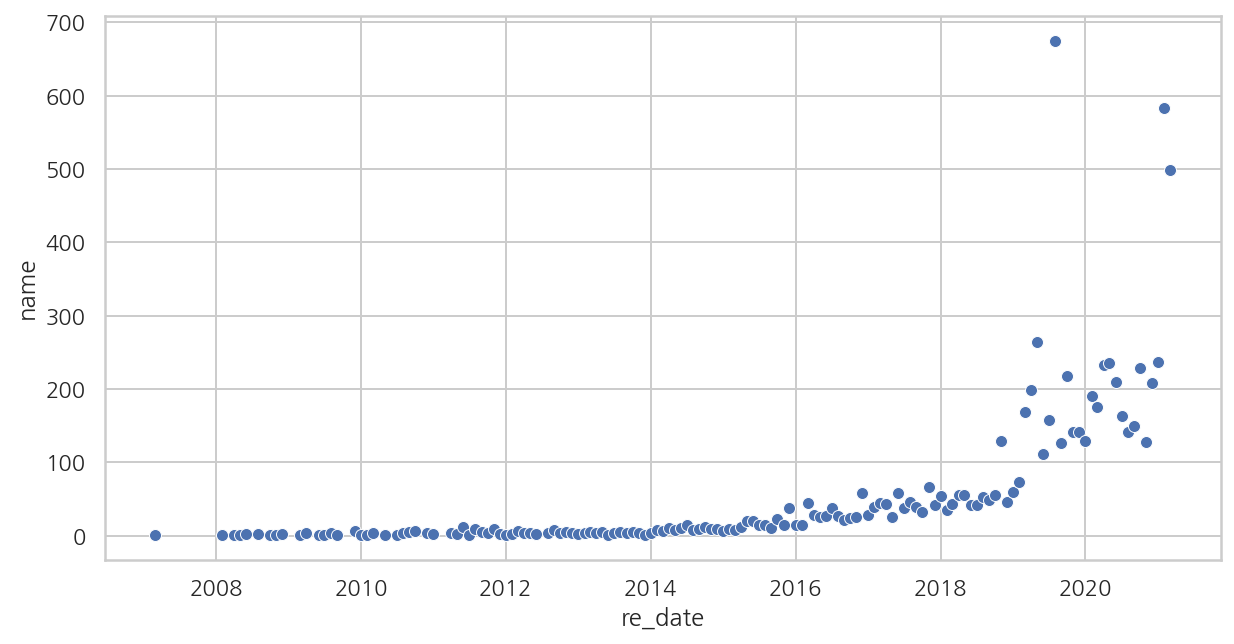

In [40]:
plt.figure(figsize = (10,5))
sns.scatterplot(x= "re_date", y = "name", data=question)
#의외로 제품수가 급증하는 건 19년도부터인듯... 

In [41]:
(nutrients["cate_4"].unique())

array(['기타건강보조식품', '프로바이오틱스', '밀크씨슬', '멀티비타민', '오메가3', '크릴오일', '비타민C',
       '환자식/영양보충식', '루테인', '홍삼', '프리바이오틱스', '마그네슘', '엽산', '프로폴리스',
       '폴리코사놀', '비타민B', '칼슘', '알로에정/겔', '비타민D', '코큐텐', '철분', '보스웰리아',
       '효모', '스피루리나', '아연', '키토산', '쏘팔메토', '글루코사민', '비오틴', '감마리놀렌산',
       'MSM', '칼륨', '건강분말', '클로렐라', '셀레늄', '헛개나무', '건강음료', '로얄제리', '비타민A',
       '스쿠알렌', '건강환/정', '석류즙', '기타건강즙', '꿀', '비타민E', '기타비타민'],
      dtype=object)

In [42]:
"""
fig, axes = plt.subplots(nrows = (len(list(nutrients["cate_4"].unique())) // 3)+1, ncols = 3, figsize = (20, 70)) 
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)

cate_list = list(nutrients["cate_4"].unique())

for index, cate_name in enumerate(cate_list): 
    grouping = nutrients[nutrients["cate_4"] == cate_name].groupby(["cate_4", "re_date"]).count().reset_index()
    ax = sns.scatterplot(x= "re_date", y = "name", data=grouping, 
                     ax = axes[index//3, index%3])
    
    ax.set_title(cate_name)
    ax.set_ylabel("counts");ax.set_xlabel("date")



plt.show()
"""

'\nfig, axes = plt.subplots(nrows = (len(list(nutrients["cate_4"].unique())) // 3)+1, ncols = 3, figsize = (20, 70)) \nplt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)\n\ncate_list = list(nutrients["cate_4"].unique())\n\nfor index, cate_name in enumerate(cate_list): \n    grouping = nutrients[nutrients["cate_4"] == cate_name].groupby(["cate_4", "re_date"]).count().reset_index()\n    ax = sns.scatterplot(x= "re_date", y = "name", data=grouping, \n                     ax = axes[index//3, index%3])\n    \n    ax.set_title(cate_name)\n    ax.set_ylabel("counts");ax.set_xlabel("date")\n\n\n\nplt.show()\n'

In [43]:
"""
fig, axes = plt.subplots(nrows = (len(list(healthfood["cate_4"].unique())) // 3)+1, ncols = 3, figsize = (20, 30)) 
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)

cate_list = list(healthfood["cate_4"].unique())

for index, cate_name in enumerate(cate_list): 
    grouping = healthfood[healthfood["cate_4"] == cate_name].groupby(["cate_4", "re_date"]).count().reset_index()
    ax = sns.scatterplot(x= "re_date", y = "name", data=grouping, 
                     ax = axes[index//3, index%3])
    
    ax.set_title(cate_name)
    ax.set_ylabel("counts");ax.set_xlabel("date")


plt.show()
"""

'\nfig, axes = plt.subplots(nrows = (len(list(healthfood["cate_4"].unique())) // 3)+1, ncols = 3, figsize = (20, 30)) \nplt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)\n\ncate_list = list(healthfood["cate_4"].unique())\n\nfor index, cate_name in enumerate(cate_list): \n    grouping = healthfood[healthfood["cate_4"] == cate_name].groupby(["cate_4", "re_date"]).count().reset_index()\n    ax = sns.scatterplot(x= "re_date", y = "name", data=grouping, \n                     ax = axes[index//3, index%3])\n    \n    ax.set_title(cate_name)\n    ax.set_ylabel("counts");ax.set_xlabel("date")\n\n\nplt.show()\n'

In [44]:
"""
nut_etc = nutrients[nutrients["cate_4"] == "기타건강보조식품"]

fig, axes = plt.subplots(nrows = ((len(nut_etc["cate_5"].unique())) // 3)+1, ncols = 3, figsize = (20, 60)) 
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)

cate_list = list(nut_etc["cate_5"].unique())

for index, cate_name in enumerate(cate_list): 
    grouping = nutrients[nutrients["cate_5"] == cate_name].groupby(["cate_5", "re_date"]).count().reset_index()
    ax = sns.scatterplot(x= "re_date", y = "name", data=grouping, 
                     ax = axes[index//3, index%3])
    
    ax.set_title(cate_name)
    ax.set_ylabel("counts");ax.set_xlabel("date")


plt.show()
"""

'\nnut_etc = nutrients[nutrients["cate_4"] == "기타건강보조식품"]\n\nfig, axes = plt.subplots(nrows = ((len(nut_etc["cate_5"].unique())) // 3)+1, ncols = 3, figsize = (20, 60)) \nplt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)\n\ncate_list = list(nut_etc["cate_5"].unique())\n\nfor index, cate_name in enumerate(cate_list): \n    grouping = nutrients[nutrients["cate_5"] == cate_name].groupby(["cate_5", "re_date"]).count().reset_index()\n    ax = sns.scatterplot(x= "re_date", y = "name", data=grouping, \n                     ax = axes[index//3, index%3])\n    \n    ax.set_title(cate_name)\n    ax.set_ylabel("counts");ax.set_xlabel("date")\n\n\nplt.show()\n'

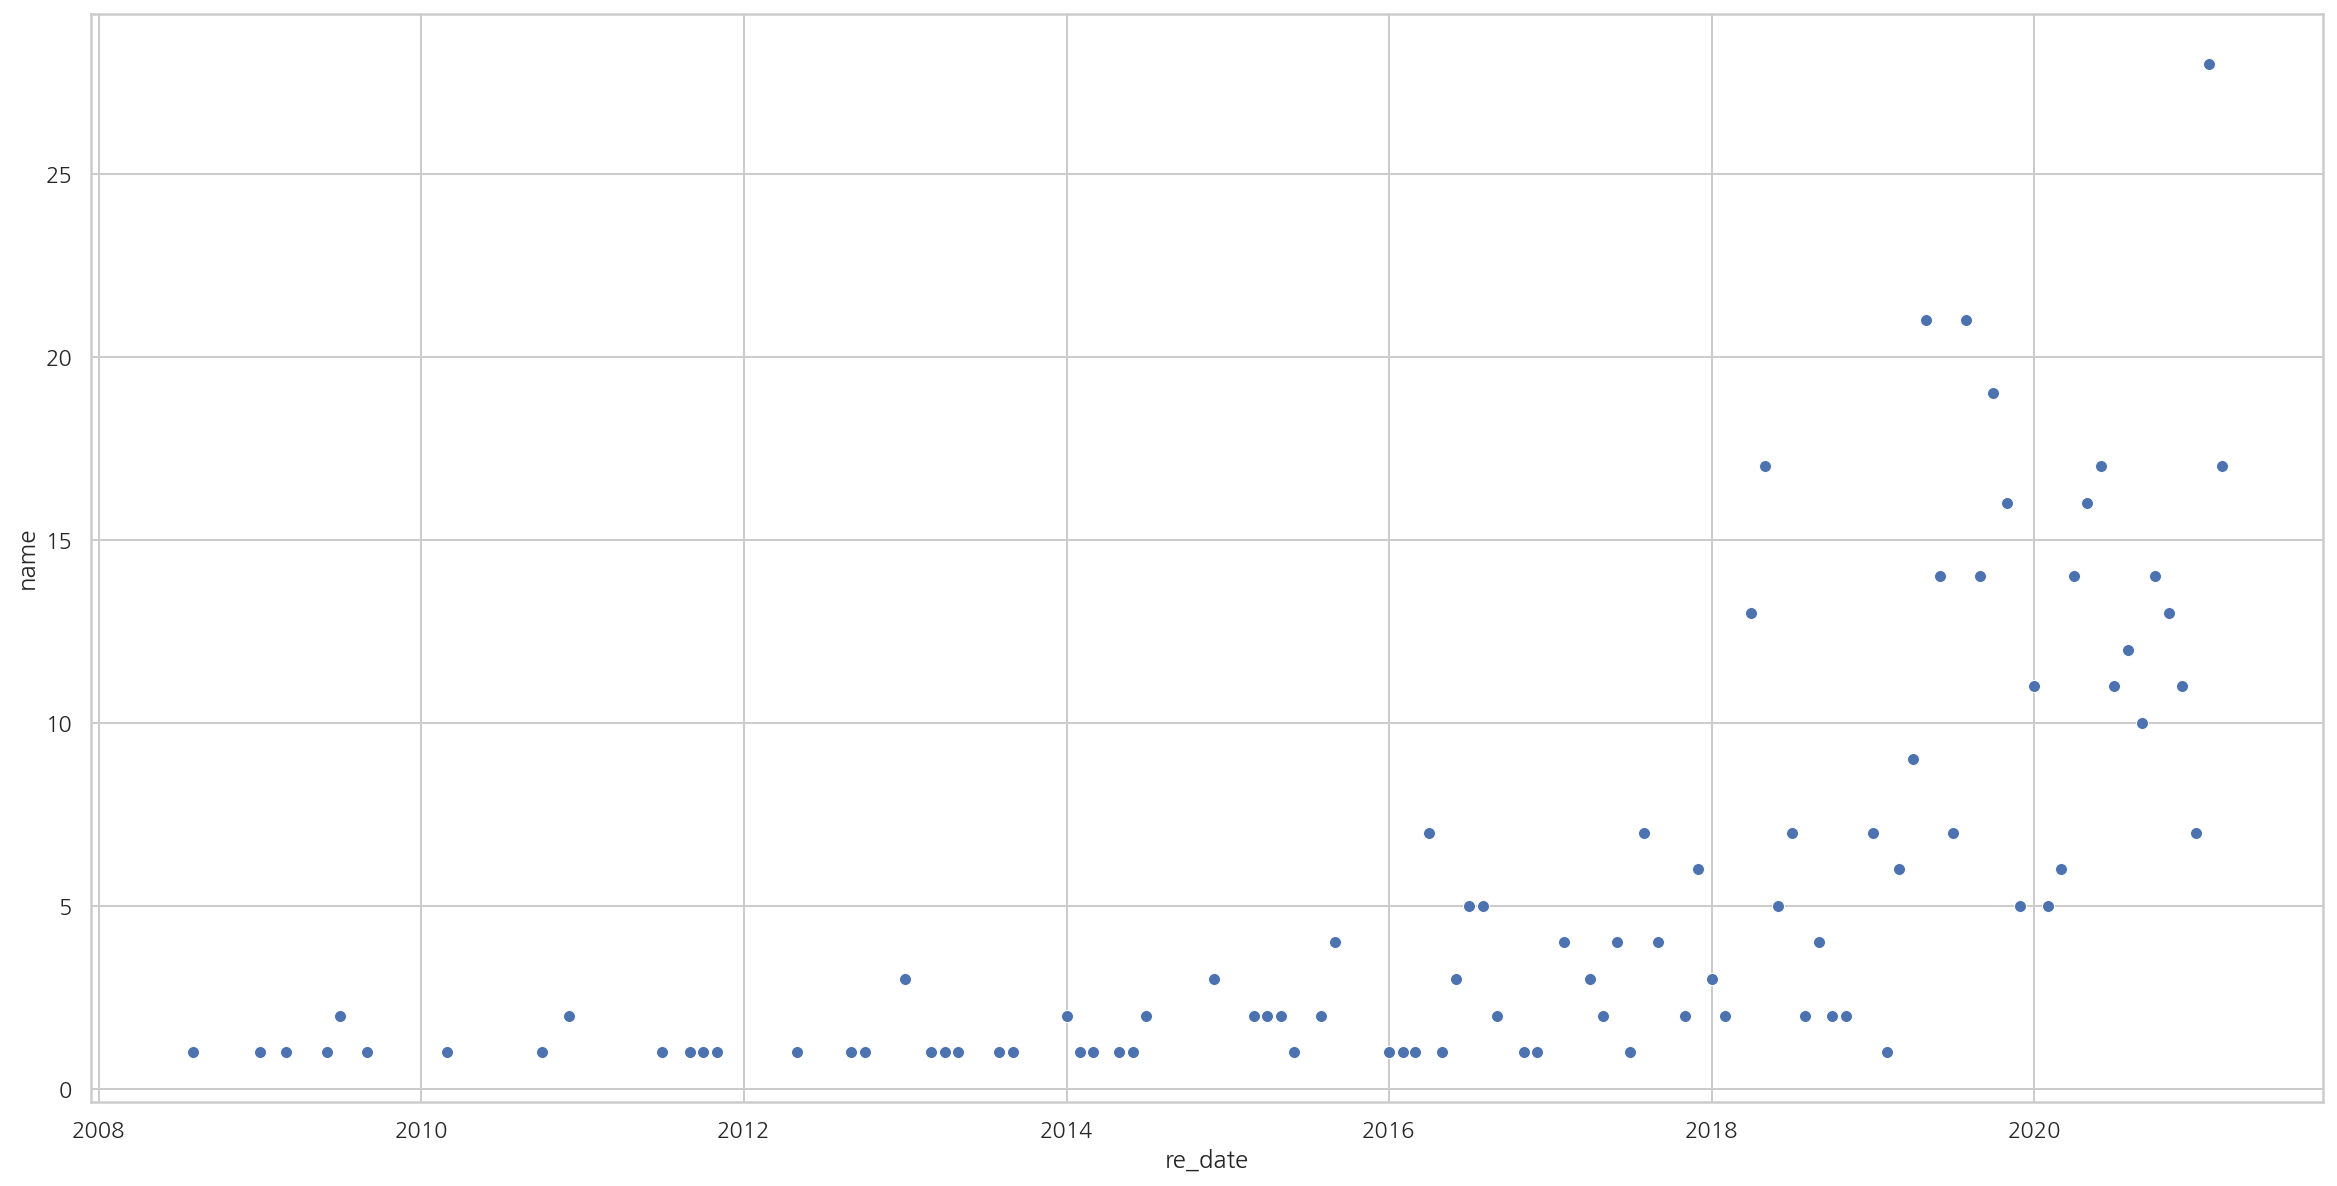

In [45]:
data = healthfood[healthfood["cate_4"] == "가르시니아"].groupby(["cate_4","re_date"]).count().reset_index()
plt.figure(figsize = (20,10))
sns.scatterplot(x = "re_date", y = "name", data = data)
plt.show()

In [46]:
"""
fig, axes = plt.subplots(nrows = (len(list(nutrients["cate_4"].unique())) // 3)+1, ncols = 3, figsize = (20, 70)) 
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)

cate_list = list(nutrients["cate_4"].unique())

for index, cate_name in enumerate(cate_list): 
    grouping = nutrients[nutrients["cate_4"] == cate_name]
    ax = sns.scatterplot(x= "price", y = "review", data=grouping, 
                     ax = axes[index//3, index%3])
    
    ax.set_title(cate_name)
    ax.set_ylabel("review");ax.set_xlabel("price")



plt.show()
"""

'\nfig, axes = plt.subplots(nrows = (len(list(nutrients["cate_4"].unique())) // 3)+1, ncols = 3, figsize = (20, 70)) \nplt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)\n\ncate_list = list(nutrients["cate_4"].unique())\n\nfor index, cate_name in enumerate(cate_list): \n    grouping = nutrients[nutrients["cate_4"] == cate_name]\n    ax = sns.scatterplot(x= "price", y = "review", data=grouping, \n                     ax = axes[index//3, index%3])\n    \n    ax.set_title(cate_name)\n    ax.set_ylabel("review");ax.set_xlabel("price")\n\n\n\nplt.show()\n'

In [47]:
nutrients.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7832 entries, 88 to 7907
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   name     7832 non-null   object        
 1   price    7832 non-null   int64         
 2   brand    5574 non-null   object        
 3   cate_1   7832 non-null   object        
 4   cate_2   7832 non-null   object        
 5   cate_3   7832 non-null   object        
 6   cate_4   7832 non-null   object        
 7   review   7832 non-null   int64         
 8   date     7832 non-null   int64         
 9   tag      2976 non-null   object        
 10  cate_5   7832 non-null   object        
 11  re_date  7832 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 795.4+ KB


In [48]:
healthfood.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7633 entries, 0 to 7999
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   name     7633 non-null   object        
 1   price    7633 non-null   int64         
 2   brand    4637 non-null   object        
 3   cate_1   7633 non-null   object        
 4   cate_2   7633 non-null   object        
 5   cate_3   7633 non-null   object        
 6   cate_4   7633 non-null   object        
 7   review   7633 non-null   int64         
 8   date     7633 non-null   int64         
 9   tag      2324 non-null   object        
 10  cate_5   7633 non-null   object        
 11  re_date  7633 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 775.2+ KB


In [49]:
total_set = pd.concat([nutrients, healthfood], axis = 0)

In [57]:
total_set = total_set.reset_index(drop=True)

In [52]:
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [64]:
cate_4_names = total_set["cate_4"].unique()
le = LabelEncoder()
le.fit(cate_4_names)

LabelEncoder()

In [69]:
total_set["enc_cate"] = le.transform(total_set["cate_4"])

In [71]:
total_set.tail(10)

name   price     brand  \
15455       하나마이 피쉬콜라겐 스틱 3세트 일본 먹는 저분자 피시생선어류 펩타이드 분말가루   29400      하나마이   
15456                       식이섬유풍부 차전자피 분말 300g (안전검사완료)    8160     두손애약초   
15457               GNM자연의품격 프랑스산 먹는 어류 피쉬콜라겐 분말 100g 3통   33210  GNM자연의품격   
15458                                  칼로리 바란스  파인애플 76g     960      해태제과   
15459                순수식품 리얼 석류 저분자 콜라겐 젤리 스틱 1박스(총 45포)   22900      순수식품   
15460                                  속편한 다이어트 3g x 30포  110000    네츄럴굿띵스   
15461                       kolon/코오롱제약 뉴트리션 퍼펙트파워젤 (낱개)    1500       NaN   
15462                 엘프래시 금쪽같은 내 피부 300 달톤 콜라겐 99% 100g   13500       NaN   
15463                 프롬바이오 선미 와일드망고 다이어트 젤리 플러스 56포/8주분   79050     프롬바이오   
15464  네오셀 NeoCell 피쉬 콜라겐 120정,/ Neocell Fish Collage...   21600       네오셀   

      cate_1  cate_2 cate_3 cate_4  review      date               tag cate_5  \
15455     식품  다이어트식품    콜라겐    콜라겐     179  20180510  기미없애는방법,관절에좋은영양제    콜라겐   
15456     식품  다이어트식품   식이섬유   식이섬유     179  20200318               NaN   식이섬유   
15457     식품  다이어트식품    콜라겐    콜라겐     179  20180307               NaN    콜라겐   
15458     식품  다이어트식품  다이어트바  다이어트바     179  20200322               NaN  다이어트바   
15459     식품  다이어트식품    콜라겐    콜라겐     178  20200625               NaN    콜라겐   
15460     식품  다이어트식품  가르시니아  가르시니아     178  20190805               NaN  가르시니아   
15461     식품  다이어트식품  헬스보충제  헬스보충제      94  20150314               NaN  헬스보충제   
15462     식품  다이어트식품    콜라겐    콜라겐     178  20201225               NaN    콜라겐   
15463     식품  다이어트식품  와일드망고  와일드망고     178  20181221               NaN  와일드망고   
15464     식품  다이어트식품    콜라겐    콜라겐     143  20201016             미국영양제    콜라겐   

         re_date  enc_cate  
15455 2018-05-01        49  
15456 2020-03-01        36  
15457 2018-03-01        49  
15458 2020-03-01        16  
15459 2020-06-01        49  
15460 2019-08-01         2  
15461 2015-03-01        58  
15462 2020-12-01        49  
15463 2018-12-01        42  
15464 2020-10-01        49

In [73]:
corr_set = total_set[["price", "review", "re_date", "enc_cate"]]

In [79]:
corr_set.head(10)

price  review    re_date  enc_cate
0   64500   15822 2019-11-01        10
1   75800   20314 2018-12-01        10
2   36500   20069 2018-02-01        10
3   59800   16003 2019-04-01        10
4   14900   15776 2019-05-01        10
5   38000   15520 2018-06-01        10
6   25376   15318 2019-08-01        10
7   10147   15318 2019-08-01        10
8   59800   14889 2018-02-01        10
9  135000   13032 2015-05-01        10

In [91]:
mypivot = corr_set.pivot_table(
                    values = "review", 
                    index = "re_date",
                    columns = "enc_cate",
                    aggfunc = "count",
                    fill_value = 0
                    )

In [87]:
le.inverse_transform([54, 58])

array(['프로바이오틱스', '헬스보충제'], dtype=object)

In [92]:
mypivot.corr()

enc_cate        0         1         2         3         4         5   \
enc_cate                                                               
0         1.000000  0.379613  0.500917  0.298432  0.205745  0.063558   
1         0.379613  1.000000  0.615853  0.422762 -0.033130  0.082864   
2         0.500917  0.615853  1.000000  0.525671  0.266287  0.204159   
3         0.298432  0.422762  0.525671  1.000000  0.080497  0.001574   
4         0.205745 -0.033130  0.266287  0.080497  1.000000  0.148425   
...            ...       ...       ...       ...       ...       ...   
58        0.366703  0.535670  0.729954  0.527084  0.222399  0.079323   
59        0.256604  0.288283  0.493093  0.344984  0.257727  0.183905   
60        0.353894  0.261297  0.503864  0.519612  0.266664 -0.011343   
61        0.073236  0.231535  0.345574  0.211732  0.129741  0.164786   
62        0.325508  0.542102  0.692123  0.529450  0.308022  0.230822   

enc_cate        6         7         8         9   ...        53        54  \
enc_cate                                          ...                       
0        -0.009849  0.346124  0.447673  0.354888  ...  0.236639  0.509427   
1         0.021726  0.252607  0.602135  0.637055  ...  0.493434  0.700081   
2         0.181956  0.378722  0.741213  0.586226  ...  0.434964  0.865988   
3         0.050496  0.228564  0.363482  0.524363  ...  0.277292  0.613677   
4         0.119987  0.127869  0.153034  0.181672  ...  0.011261  0.257589   
...            ...       ...       ...       ...  ...       ...       ...   
58        0.138132  0.399350  0.672290  0.619802  ...  0.439001  0.806160   
59       -0.067470  0.164982  0.361666  0.415470  ...  0.182137  0.498571   
60        0.104569  0.279538  0.442593  0.491539  ...  0.332765  0.683418   
61        0.127964  0.200394  0.288948  0.212023  ...  0.169172  0.390283   
62        0.172317  0.277125  0.619952  0.671470  ...  0.499453  0.755940   

enc_cate        55        56        57        58        59        60  \
enc_cate                                                               
0         0.394847  0.422144 -0.040650  0.366703  0.256604  0.353894   
1         0.691771  0.553842  0.036750  0.535670  0.288283  0.261297   
2         0.744565  0.693486  0.057180  0.729954  0.493093  0.503864   
3         0.547824  0.434322 -0.041315  0.527084  0.344984  0.519612   
4         0.198141  0.148872 -0.020505  0.222399  0.257727  0.266664   
...            ...       ...       ...       ...       ...       ...   
58        0.673692  0.600606  0.148560  1.000000  0.386945  0.710223   
59        0.383381  0.148542 -0.024341  0.386945  1.000000  0.453505   
60        0.543315  0.507404  0.041788  0.710223  0.453505  1.000000   
61        0.372464  0.237748 -0.039810  0.298774  0.253516  0.228578   
62        0.659627  0.541003 -0.033119  0.672250  0.601557  0.552786   

enc_cate        61        62  
enc_cate                      
0         0.073236  0.325508  
1         0.231535  0.542102  
2         0.345574  0.692123  
3         0.211732  0.529450  
4         0.129741  0.308022  
...            ...       ...  
58        0.298774  0.672250  
59        0.253516  0.601557  
60        0.228578  0.552786  
61        1.000000  0.329419  
62        0.329419  1.000000  

[63 rows x 63 columns]

In [90]:
len(total_set["cate_4"].unique())

63

<AxesSubplot:xlabel='enc_cate', ylabel='enc_cate'>

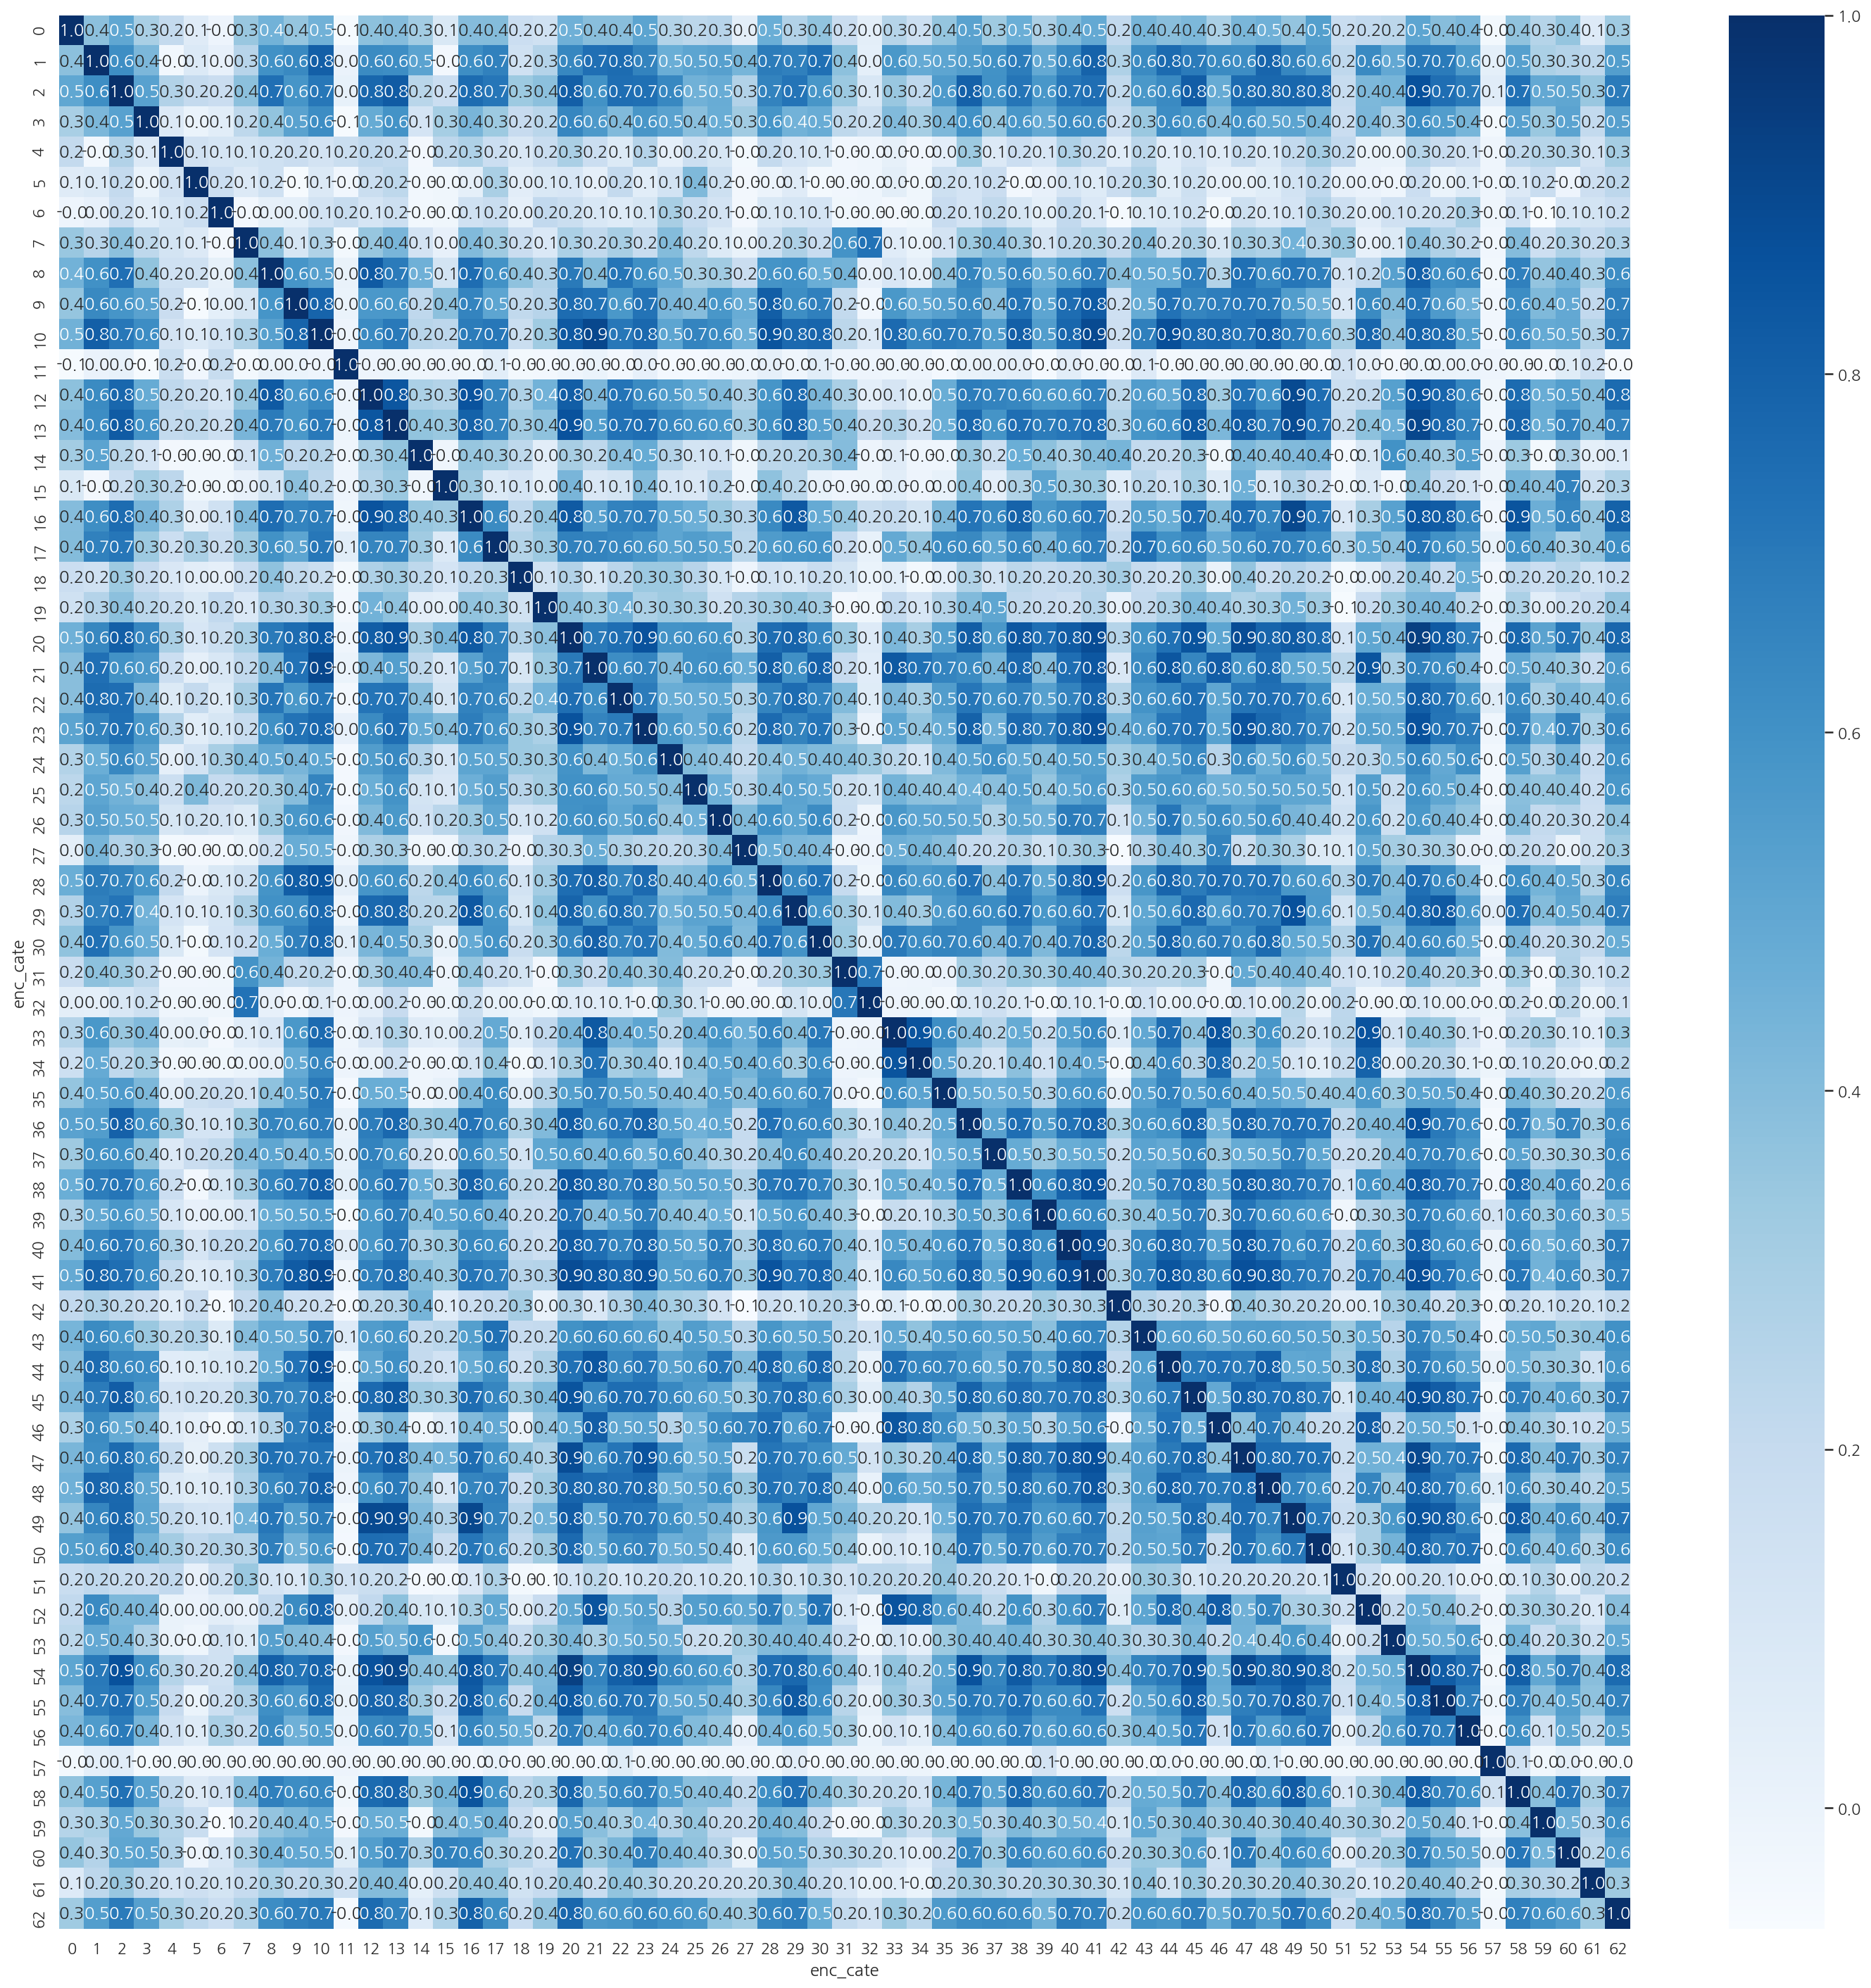

In [94]:
plt.figure(figsize = (25,25))
sns.heatmap(data = mypivot.corr(), 
           annot = True,
           fmt = '.1f', 
           cmap = "Blues")

In [95]:
corr_table = mypivot.corr()

In [96]:
corr_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63 entries, 0 to 62
Data columns (total 63 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       63 non-null     float64
 1   1       63 non-null     float64
 2   2       63 non-null     float64
 3   3       63 non-null     float64
 4   4       63 non-null     float64
 5   5       63 non-null     float64
 6   6       63 non-null     float64
 7   7       63 non-null     float64
 8   8       63 non-null     float64
 9   9       63 non-null     float64
 10  10      63 non-null     float64
 11  11      63 non-null     float64
 12  12      63 non-null     float64
 13  13      63 non-null     float64
 14  14      63 non-null     float64
 15  15      63 non-null     float64
 16  16      63 non-null     float64
 17  17      63 non-null     float64
 18  18      63 non-null     float64
 19  19      63 non-null     float64
 20  20      63 non-null     float64
 21  21      63 non-null     float64
 22  22  

In [156]:
corr_table[0],max(corr_table[0])

(enc_cate
 0     0.000000
 1     0.379613
 2     0.500917
 3     0.298432
 4     0.205745
 5     0.063558
 6    -0.009849
 7     0.346124
 8     0.447673
 9     0.354888
 10    0.453654
 11   -0.057677
 12    0.376142
 13    0.396284
 14    0.317194
 15    0.095023
 16    0.395518
 17    0.401134
 18    0.171784
 19    0.150126
 20    0.457880
 21    0.390533
 22    0.388678
 23    0.513938
 24    0.265596
 25    0.235640
 26    0.250149
 27    0.044339
 28    0.468718
 29    0.267066
 30    0.369008
 31    0.179182
 32    0.042818
 33    0.255200
 34    0.169875
 35    0.356975
 36    0.522151
 37    0.331712
 38    0.469060
 39    0.285248
 40    0.402494
 41    0.488114
 42    0.213794
 43    0.435597
 44    0.390791
 45    0.417940
 46    0.289876
 47    0.427484
 48    0.457359
 49    0.358687
 50    0.539073
 51    0.183508
 52    0.215500
 53    0.236639
 54    0.509427
 55    0.394847
 56    0.422144
 57   -0.040650
 58    0.366703
 59    0.256604
 60    0.353894
 61    0.07323

In [99]:
for index in range(len(corr_table)) :
    corr_table.loc[index, index] = 0

In [119]:
correlations = []
label_nums = []
label_names = []

for i in range(len(corr_table)) :
    correlations.append(max(corr_table[i]))
    label_nums.append(corr_table[corr_table[i] == max(corr_table[i])].index.values)
    label_names.append(le.inverse_transform(corr_table[corr_table[i] == max(corr_table[i])].index.values))
    

In [129]:
labels = list(range(0,63))
labels = le.inverse_transform(labels)

In [144]:
correlations = pd.DataFrame(correlations)
label_nums = pd.DataFrame(label_nums)
label_names = pd.DataFrame(label_names)
labels = pd.DataFrame(labels)
corr_info = pd.concat([labels, correlations, label_nums, label_names], 
                      axis = 1,
                      keys = ["cate_4", "max_corr", "max_corr_cate", "max_corr_name"])

In [147]:
corr_info

cate_4  max_corr max_corr_cate max_corr_name
            0         0             0             0
0         CLA  0.539073            50          크릴오일
1         MSM  0.805022            10      기타건강보조식품
2       가르시니아  0.865988            54       프로바이오틱스
3      감마리놀렌산  0.649431            20           루테인
4        건강분말  0.333498            36          식이섬유
5        건강음료  0.416173            25          뷰티푸드
6       건강환/정  0.299620            24         보스웰리아
7         곤약쌀  0.728747            32           석류즙
8        곤약젤리  0.825855            12       기타곤약가공품
9       글루코사민  0.822509            41          오메가3
10   기타건강보조식품  0.907435            21          마그네슘
11      기타건강즙  0.194216             6         건강환/정
12    기타곤약가공품  0.894391            49           콜라겐
13   기타다이어트식품  0.904880            54       프로바이오틱스
14      기타비타민  0.598696            53         폴리코사놀
15          꿀  0.662827            60     환자식/영양보충식
16      다이어트바  0.903116            49           콜라겐
17      다이어트차  0.736840            43           잔티젠
18        레몬밤  0.473521            56       프리바이오틱스
19       로얄제리  0.505574            37          쏘팔메토
20        루테인  0.934791            54       프로바이오틱스
21       마그네슘  0.907435            10      기타건강보조식품
22      멀티비타민  0.805376            54       프로바이오틱스
23       밀크씨슬  0.865539            41          오메가3
24      보스웰리아  0.644070            54       프로바이오틱스
25       뷰티푸드  0.658025            10      기타건강보조식품
26        비오틴  0.711155            44            철분
27       비타민A  0.660867            46            칼륨
28       비타민B  0.855319            41          오메가3
29       비타민C  0.864396            49           콜라겐
30       비타민D  0.798402            21          마그네슘
31       비타민E  0.704792            32           석류즙
32        석류즙  0.728747             7           곤약쌀
33        셀레늄  0.854664            52           키토산
34       스쿠알렌  0.850995            33           셀레늄
35      스피루리나  0.701284            10      기타건강보조식품
36       식이섬유  0.858886            54       프로바이오틱스
37       쏘팔메토  0.670018            55         프로폴리스
38         아연  0.862474            41          오메가3
39     알로에정/겔  0.741769            20           루테인
40         엽산  0.885714            41          오메가3
41       오메가3  0.894310            10      기타건강보조식품
42      와일드망고  0.435554            14         기타비타민
43        잔티젠  0.736840            17         다이어트차
44         철분  0.872621            10      기타건강보조식품
45        카테킨  0.872761            54       프로바이오틱스
46         칼륨  0.845842            33           셀레늄
47         칼슘  0.899381            54       프로바이오틱스
48        코큐텐  0.841373            41          오메가3
49        콜라겐  0.903116            16         다이어트바
50       크릴오일  0.792277            54       프로바이오틱스
51       클로렐라  0.354836            35         스피루리나
52        키토산  0.854664            33           셀레늄
53      폴리코사놀  0.598696            14         기타비타민
54    프로바이오틱스  0.934791            20           루테인
55      프로폴리스  0.826414            20           루테인
56    프리바이오틱스  0.738830            54       프로바이오틱스
57       헛개나무  0.148560            58         헬스보충제
58      헬스보충제  0.851650            16         다이어트바
59         홍삼  0.601557            62         히알루론산
60  환자식/영양보충식  0.721876            20           루테인
61         효모  0.402174            13      기타다이어트식품
62      히알루론산  0.793904            16         다이어트바

In [170]:
label_nums = []

for i in range(len(corr_table)) :
    label_nums.append((corr_table[(corr_table.loc[:,i])>= 0.75]).index)
    
label_names = []

for i in range(len(corr_table)) :
    if label_nums[i] is not None : 
        label_names.append(le.inverse_transform(label_nums[i]))
    else : 
        continue

In [165]:
label_nums[0], label_names[0]

(Int64Index([], dtype='int64', name='enc_cate'), array([], dtype=float64))

In [166]:
label_nums[1], label_names[1]

(Int64Index([10, 22, 41, 44, 48], dtype='int64', name='enc_cate'),
 array(['기타건강보조식품', '멀티비타민', '오메가3', '철분', '코큐텐'], dtype=object))

In [167]:
label_nums = pd.DataFrame(label_nums)
label_names = pd.DataFrame(label_names)

In [168]:
group_info = pd.concat([labels, label_nums, label_names], 
                      axis = 1,
                      keys = ["cate_4", "group", "group_name", "max_corr_name"])

In [169]:
group_info

cate_4 group                                                  ...  \
           0     0     1     2     3     4     5     6     7     8   ...   
0         CLA   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
1         MSM  10.0  22.0  41.0  44.0  48.0   NaN   NaN   NaN   NaN  ...   
2       가르시니아  12.0  13.0  16.0  20.0  36.0  45.0  47.0  48.0  49.0  ...   
3      감마리놀렌산   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
4        건강분말   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
5        건강음료   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
6       건강환/정   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
7         곤약쌀   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
8        곤약젤리  12.0  54.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
9       글루코사민  10.0  20.0  28.0  41.0   NaN   NaN   NaN   NaN   NaN  ...   
10   기타건강보조식품   1.0   9.0  20.0  21.0  23.0  28.0  29.0  30.0  33.0  ...   
11      기타건강즙   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
12    기타곤약가공품   2.0   8.0  13.0  16.0  20.0  29.0  45.0  49.0  54.0  ...   
13   기타다이어트식품   2.0  12.0  16.0  20.0  29.0  36.0  41.0  45.0  47.0  ...   
14      기타비타민   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
15          꿀   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
16      다이어트바   2.0  12.0  13.0  20.0  29.0  38.0  49.0  54.0  55.0  ...   
17      다이어트차   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
18        레몬밤   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
19       로얄제리   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
20        루테인   2.0   9.0  10.0  12.0  13.0  16.0  23.0  29.0  36.0  ...   
21       마그네슘  10.0  28.0  30.0  33.0  38.0  41.0  44.0  46.0  48.0  ...   
22      멀티비타민   1.0  29.0  41.0  54.0   NaN   NaN   NaN   NaN   NaN  ...   
23       밀크씨슬  10.0  20.0  28.0  36.0  38.0  40.0  41.0  47.0  48.0  ...   
24      보스웰리아   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
25       뷰티푸드   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
26        비오틴   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
27       비타민A   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
28       비타민B   9.0  10.0  21.0  23.0  40.0  41.0  44.0   NaN   NaN  ...   
29       비타민C  10.0  12.0  13.0  16.0  20.0  22.0  45.0  49.0  54.0  ...   
30       비타민D  10.0  21.0  41.0  44.0  48.0   NaN   NaN   NaN   NaN  ...   
31       비타민E   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
32        석류즙   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
33        셀레늄  10.0  21.0  34.0  46.0  52.0   NaN   NaN   NaN   NaN  ...   
34       스쿠알렌  33.0  46.0  52.0   NaN   NaN   NaN   NaN   NaN   NaN  ...   
35      스피루리나   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
36       식이섬유   2.0  13.0  20.0  23.0  41.0  45.0  47.0  54.0   NaN  ...   
37       쏘팔메토   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
38         아연  10.0  16.0  20.0  21.0  23.0  40.0  41.0  45.0  47.0  ...   
39     알로에정/겔   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
40         엽산  10.0  20.0  23.0  28.0  38.0  41.0  44.0  47.0  54.0  ...   
41       오메가3   1.0   9.0  10.0  13.0  20.0  21.0  22.0  23.0  28.0  ...   
42      와일드망고   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
43        잔티젠   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
44         철분   1.0  10.0  21.0  28.0  30.0  40.0  41.0  48.0  52.0  ...   
45        카테킨   2.0  10.0  12.0  13.0  20.0  29.0  36.0  38.0  41.0  ...   
46         칼륨  10.0  21.0  33.0  34.0  52.0   NaN   NaN   NaN   NaN  ...   
47         칼슘   2.0  13.0  20.0  23.0  36.0  38.0  40.0  41.0  45.0  ...   
48        코큐텐   1.0   2.0  10.0  20.0  21.0  23.0  30.0  38.0  41.0  ...   
49        콜라겐   2.0  12.0  13.0  16.0  20.0  29.0  45.0  54.0  55.0  ...   
50       크릴오일   2.0  20.0  54.0   NaN   NaN   NaN   NaN

In [175]:
pd.DataFrame(label_names)

0         1         2         3         4      5      6        7   \
0       None      None      None      None      None   None   None     None   
1   기타건강보조식품     멀티비타민      오메가3        철분       코큐텐   None   None     None   
2    기타곤약가공품  기타다이어트식품     다이어트바       루테인      식이섬유    카테킨     칼슘      코큐텐   
3       None      None      None      None      None   None   None     None   
4       None      None      None      None      None   None   None     None   
5       None      None      None      None      None   None   None     None   
6       None      None      None      None      None   None   None     None   
7       None      None      None      None      None   None   None     None   
8    기타곤약가공품   프로바이오틱스      None      None      None   None   None     None   
9   기타건강보조식품       루테인      비타민B      오메가3      None   None   None     None   
10       MSM     글루코사민       루테인      마그네슘      밀크씨슬   비타민B   비타민C     비타민D   
11      None      None      None      None      None   None   None     None   
12     가르시니아      곤약젤리  기타다이어트식품     다이어트바       루테인   비타민C    카테킨      콜라겐   
13     가르시니아   기타곤약가공품     다이어트바       루테인      비타민C   식이섬유   오메가3      카테킨   
14      None      None      None      None      None   None   None     None   
15      None      None      None      None      None   None   None     None   
16     가르시니아   기타곤약가공품  기타다이어트식품       루테인      비타민C     아연    콜라겐  프로바이오틱스   
17      None      None      None      None      None   None   None     None   
18      None      None      None      None      None   None   None     None   
19      None      None      None      None      None   None   None     None   
20     가르시니아     글루코사민  기타건강보조식품   기타곤약가공품  기타다이어트식품  다이어트바   밀크씨슬     비타민C   
21  기타건강보조식품      비타민B      비타민D       셀레늄        아연   오메가3     철분       칼륨   
22       MSM      비타민C      오메가3   프로바이오틱스      None   None   None     None   
23  기타건강보조식품       루테인      비타민B      식이섬유        아연     엽산   오메가3       칼슘   
24      None      None      None      None      None   None   None     None   
25      None      None      None      None      None   None   None     None   
26      None      None      None      None      None   None   None     None   
27      None      None      None      None      None   None   None     None   
28     글루코사민  기타건강보조식품      마그네슘      밀크씨슬        엽산   오메가3     철분     None   
29  기타건강보조식품   기타곤약가공품  기타다이어트식품     다이어트바       루테인  멀티비타민    카테킨      콜라겐   
30  기타건강보조식품      마그네슘      오메가3        철분       코큐텐   None   None     None   
31      None      None      None      None      None   None   None     None   
32      None      None      None      None      None   None   None     None   
33  기타건강보조식품      마그네슘      스쿠알렌        칼륨       키토산   None   None     None   
34       셀레늄        칼륨       키토산      None      None   None   None     None   
35      None      None      None      None      None   None   None     None   
36     가르시니아  기타다이어트식품       루테인      밀크씨슬      오메가3    카테킨     칼슘  프로바이오틱스   
37      None      None      None      None      None   None   None     None   
38  기타건강보조식품     다이어트바       루테인      마그네슘      밀크씨슬     엽산   오메가3      카테킨   
39      None      None      None      None      None   None   None     None   
40  기타건강보조식품       루테인      밀크씨슬      비타민B        아연   오메가3     철분       칼슘   
41       MSM     글루코사민  기타건강보조식품  기타다이어트식품       루테인   마그네슘  멀티비타민     밀크씨슬   
42      None      None      None      None      None   None   None     None   
43      None      None      None      None      None   None   None     None   
44       MSM  기타건강보조식품      마그네슘      비타민B      비타민D     엽산   오메가3      코큐텐   
45     가르시니아  기타건강보조식품   기타곤약가공품  기타다이어트식품       루테인   비타민C   식이섬유       아연   
46  기타건강보조식품      마그네슘       셀레늄      스쿠알렌       키토산   None   None     None   
47     가르시니아  기타다이어트식품       루테인      밀크씨슬      식이섬유     아연     엽산     오메가3   
48       MSM     가르시니아  기타건강보조식품       루테인      마그네슘   밀크씨슬   비타민D       아연   
49     가르시니아   기타곤약가공품  기타다이어트식품     다이어트바       루테인   비타민C 